<div style="width:100%;text-align: center;">
    <img src="https://user.oc-static.com/upload/2019/02/24/15510245026714_Seattle_logo_landscape_blue-black.png" />
</div>

# PRESENTATION DU PROJET
##### Providence MBAINDIGUIM, ITS4 Finance
La ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation: Prédiction des
émissions de CO2

L'objectif du TP est de prédirbe les émissions de gaz CO2 de la ville de Seattle à l'aide des données des années 2019 et 2020. D'après les derniers rapports publiés sur le site de Seattle, des recommandations ont été faites pour des futures analyses. Je vais me baser sur ces recommandations dans mes travaux.
### Description de quelques variables
##### Source EUI= Source Energy/GFA
<h4><font color="#1d479b">Source ENERGY</font></h4> Correspond à la somme Electricity + Natural Gas + Steam
<h4><font color="#1d479b">Site Energy</font></h4>
C'est la Quantité d'energie consommée directement par votre propriété.
<h4><font color="#1d479b">Source ENERGY</font></h4> c'est la somme Site ENERGY + L'energie requise pour generer et vous la livrer depuis la centrale.
EPA recommande Source ENERGY parcequ'elle permet une comparaison équitable de l'efficacité thermodynamique des batiments utilisant differentes sources d'energies (Electricité, Gaz, Vapeur)
<h4><font color="#1d479b">ENERGY STAR SCORE</font></h4>

Permet d'etablir des comparaisons entre batiments de même type en termes d'efficacité energétique.
Pour determiner ENERGY Star Score, Il faut avoir la valeur réelle de Source EUI (Intensité de la consommation d'energie), sa valeur prédite à l'aide d'un modèle de regression linéaire. Ces deux valeurs doivent permettre de determiner le ratio d'efficacité energétique, <h4><font color="#1d479b">Ratio=(Valeur réelle de Source EUI)/(Valeur prédite Source EUI)</font></h4>. Plus ce ratio est faible, grande est la performance energétique. Les valeurs des ratios sont utilisés pour tracer sa distribution (ajuster cette courbe à celle de la loi gamma). L'ENERGY STAR SCORE est l'ordonnée correspondant à chacune des valeurs du ratio. Le Score varie de 0 à 100.

#### Pour plus d'informations, veuillez consulter les sites ci-après
Les données de consommation sont à télécharger [à cette adresse](https://www.seattle.gov/environment/climate-change/buildings-and-energy/energy-benchmarking/data-and-reports#individualbuildingdata)<br>
Le score Star Energy est consultable [ici](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what)<br>
La description des variables est consultable sur le [site de Seattle](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

# **SOMMAIRE:** Predict the CO2 emissions of  Seattle city from the data available ( 2019 and 2020).

This notebook consists of 3 parts

1. Cleaning and feature engineering 

2. Prediction of CO2 emissions

>2.1 Comparison of models on the training set

>2.2 Improvement of the Hyperparameters setting of the most efficient model

3. Results analysis on the testing set. 





**Ce premier notebook est intégralement dédié au cleaning et feature engineering de nos datasets**

# Librairies utilisées

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.preprocessing import Imputer
import pandas as pd
import re
import seaborn as sns
import scipy.stats as st
#import sklearn.preprocessing as sp
from ast import literal_eval 
from numpy import cov
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
plt.style.use('ggplot')
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)


## Fonctions pour comparer les colonnes de nos deux datasets

In [6]:

def compare_colums(df1,df2):
    columns_1 = list(df1.columns) 
    columns_2 = list(df2.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2

## Fonctions pour comparer les lignes de nos deux datasets

In [7]:

def compare_OSEBuildingID(df1,df2):
    OSEBuildingID_1 = list(df1.OSEBuildingID) 
    OSEBuildingID_2 = list(df2.OSEBuildingID)
    same_OSEBuildingID=[]
    diff_OSEBuildingID_2=[]
    diff_OSEBuildingID_1=[]

    for row in OSEBuildingID_2:
        if row in OSEBuildingID_1:
            same_OSEBuildingID.append(row)
        else:
            diff_OSEBuildingID_2.append(row)
    for row in OSEBuildingID_1:
        if row not in OSEBuildingID_2:
            diff_OSEBuildingID_1.append(row)
    return diff_OSEBuildingID_1, diff_OSEBuildingID_2

# Importation de nos deux datasets

In [8]:
data_2019 = pd.read_csv("2019_Building_Energy_Benchmarking.csv")
data_2020 = pd.read_csv("2020_Building_Energy_Benchmarking.csv")

### En 2019, on avait 3581 batiments et 42 variables

In [6]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3581 non-null   int64  
 1   DataYear                         3581 non-null   int64  
 2   BuildingName                     3581 non-null   object 
 3   BuildingType                     3581 non-null   object 
 4   TaxParcelIdentificationNumber    3581 non-null   object 
 5   Address                          3581 non-null   object 
 6   City                             3580 non-null   object 
 7   State                            3580 non-null   object 
 8   ZipCode                          3525 non-null   float64
 9   Latitude                         3579 non-null   float64
 10  Longitude                        3579 non-null   float64
 11  Neighborhood                     3579 non-null   object 
 12  CouncilDistrictCode 

### En 2020,on avait 3628 batiments et 42 variables

In [9]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3628 non-null   int64  
 1   DataYear                         3628 non-null   int64  
 2   BuildingName                     3628 non-null   object 
 3   BuildingType                     3628 non-null   object 
 4   TaxParcelIdentificationNumber    3628 non-null   object 
 5   Address                          3628 non-null   object 
 6   City                             3627 non-null   object 
 7   State                            3627 non-null   object 
 8   ZipCode                          3573 non-null   float64
 9   Latitude                         3626 non-null   float64
 10  Longitude                        3626 non-null   float64
 11  Neighborhood                     3626 non-null   object 
 12  CouncilDistrictCode 

### On compare les colonnes de 2019 à celles de 2020

In [10]:
diff_columns_2019, diff_columns_2020 = compare_colums(data_2019,data_2020)
diff_columns_2019

['PrimaryPropertyType']

####  Cette variable PrimaryPropertyType presente en 2019 ne figure pas en 2020. Il faut la supprimer

In [11]:
data_2019.drop(['PrimaryPropertyType'],axis=1, inplace=True)

### Comparaison pour 2020

In [12]:
diff_columns_2019, diff_columns_2020 = compare_colums(data_2019,data_2020)
diff_columns_2020

['NumberofBuildings']

####  Cette variable NumberofBuildings presente en 2020 ne figurait pas en 2019 Il faut la supprimer

In [13]:
data_2020.drop(['NumberofBuildings'],axis=1, inplace=True)

### On compare les lignes pour voir les "mouvements de batiments" entre 2019 et 2020

In [14]:
diff_OSEBuildingID_2019, diff_OSEBuildingID_2020 = compare_OSEBuildingID(data_2019,data_2020)
display(len(diff_OSEBuildingID_2019))

51

### 51 batiments de la base 2019 ne figuraient pas dans cellle de 2020. Ces 51 batiments ne faisaient plus partie des batiments de la base 2020 concernés par le Benchmarking

In [15]:
display(len(diff_OSEBuildingID_2020))

98

### 98 batiments de la base 2020 ne figuraient pas dans cellle de 2019. En d'autres termes, ce sont de nouveaux batiments ajoutés en 2020 

In [16]:
def assign_colums(df1,df2):
    OSEBuildingID_1 = list(df1.OSEBuildingID) 
    OSEBuildingID_2 = list(df2.OSEBuildingID)
    same_NumberofBuildings=[]
    diff_OSEBuildingID_2=[]
    diff_OSEBuildingID_1=[]

    for col in OSEBuildingID_2:
        if col in OSEBuildingID_1:
            df1.assign(NumberofBuildings = NOB2020 )
        else:
            diff_OSEBuildingID_2.assign(col)
    for col in OSEBuildingID_1:
        if col not in OSEBuildingID_2:
            diff_OSEBuildingID_1.append(col)
    return diff_OSEBuildingID_1, diff_OSEBuildingID_2

### On recompare à présent les colonnes des deux datatsets

In [17]:

diff_columns_2019_c, diff_columns_2020_c = compare_colums(data_2019,data_2020)
diff_columns_2020_c

[]

### Les deux sets ont même colonnes. On va les merger

In [18]:

data_m = pd.concat([data_2019,data_2020])
print(data_m.shape)
#data_m.to_csv('Data_m.csv', index=Fals

(7209, 41)


### Check le pourcentage de remplissage des colonnes

In [19]:

columns_nan_info ={}
for column in data_m.keys():
    nan_count = data_m[column].isnull().sum()
    columns_nan_info[column] = nan_count / data_m.shape[0] * 100

df_columns_nan_info = pd.DataFrame(data=np.array(list(columns_nan_info.items())),columns=['column','nan %'])
df_columns_nan_info['nan %'] = pd.to_numeric(df_columns_nan_info['nan %'])
df_columns_nan_info = df_columns_nan_info.sort_values(by=['nan %'])

print(df_columns_nan_info.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df_columns_nan_info)

(41, 2)
                             column      nan %
0                     OSEBuildingID   0.000000
33               NaturalGas(therms)   0.000000
35                 ComplianceStatus   0.000000
36                  ComplianceIssue   0.000000
17               PropertyGFAParking   0.000000
16           PropertyGFABuilding(s)   0.000000
15                 PropertyGFATotal   0.000000
14                   NumberofFloors   0.000000
13                        YearBuilt   0.000000
32                   SteamUse(kBtu)   0.000000
31                 Electricity(kWh)   0.000000
5                           Address   0.000000
4     TaxParcelIdentificationNumber   0.000000
3                      BuildingType   0.000000
2                      BuildingName   0.000000
1                          DataYear   0.000000
7                             State   0.027743
6                              City   0.027743
9                          Latitude   0.055486
10                        Longitude   0.055486
11   

<b>Explication des variables</b><br>
Plusieurs variables concernent les surfaces (GFA = Gross floor area) :<br>
- Gross floor area : surface totale
- PropertyGFAParking : surface des parkings
- PropertyGFABuilding(s) : surface des bâtiments
- ListOfAllPropertyUseTypes : les différentes utilisations des surfaces (Hotel, Parking, Restaurant, Piscine, etc.)
- LargestPropertyUseType / LargestPropertyUseTypeGFA : principale destination du bâtiment et sa surface
- SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA : seconde destination du bâtiment et sa surface
- ThirdLargestPropertyUseType	/ ThirdLargestPropertyUseTypeGFA : troisième destination du bâtiment et sa surface

Concernant l'énergie, ENERGY STAR nous indique :
- SiteEUI(kBtu/sf)	/ SiteEUIWN(kBtu/sf)	: Energy Use Intensity (EUI) ou intensité de la consommation d'énergie ; l'EUI exprime la consommation d'énergie d'un bâtiment en fonction de sa taille ou d'autres caractéristiques.<br>
- SourceEUI(kBtu/sf)	SourceEUIWN(kBtu/sf) : la source d'énergie est l'unité d'évaluation la plus équitable pour comparer différents bâtiments entre eux. La source d'énergie représente la quantité totale de combustible brut nécessaire au fonctionnement du bâtiment. Il intègre toutes les pertes de transmission, de livraison et de production. En prenant en compte toutes les consommations d'énergie, le score fournit une évaluation complète de l'efficacité énergétique d'un bâtiment. <br>

SiteEnergyUse(kBtu)	SiteEnergyUseWN(kBtu)	SteamUse(kBtu)	Electricity(kWh)	Electricity(kBtu)	NaturalGas(therms)	NaturalGas(kBtu) : l'utilisation des énergies est exprimée en diverses unités :
- kBTu : le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. Le BTU, de symbole Btu, est utilisé dans les pays anglo-saxons et asiatiques et équivaut à 1055,06 Joule ou 252 calories.<br>
1 BTU est l’énergie nécessaire pour chauffer ou refroidir une livre d’eau de 1 degré Fahrenheit au niveau de la mer.<br>
Pour convertir une puissance en Btu une puissance en watt il suffit de diviser la puissance en Btu par 3414,5 pour obtenir la puissance en Kw. <br>

- therms : le therm est une unité d'énergie thermique anglo-saxone égale à 1 000 000 unités thermiques britanniques (BTU). 
>1 kWh = 0.034095106405145 thm <br>
>1 thm = 29.329722222222 kWh#
Supprimons les colonnes qui ne nous intéressent pas dans ce projet :

State (une seule valeur)
Comments
les variables qui se terminent par WN (Weather Normalized) qui sont des corrections des conditions climatiques.
D'autres variables sont redondantes :

Electricity(kWh) / Electricity(kBtu)
NaturalGas(therms) / NaturalGas(kBtu)

### suppressions des variables qui ne nous intéressent pas

In [20]:
data_m.drop(['CouncilDistrictCode','State','ZipCode','Address','BuildingName','City'], axis=1, inplace=True)

### Suppression des variables redondantes

In [21]:
redundant_features = ['NaturalGas(therms)','Electricity(kBtu)']
data_m.drop(redundant_features, axis=1, inplace=True)

### Comme le dit l'énoncé, On va s'interesser aux Non Residential Building

In [22]:
data_m_final= data_m[~data_m['BuildingType'].str.contains("Multifamily")]
data_m_final['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

### Statistiques des types de Batiments

In [23]:
print(data_m_final['BuildingType'].value_counts())

NonResidential        2967
SPS-District K-12      198
Nonresidential COS     133
Campus                  92
Nonresidential WA        4
Name: BuildingType, dtype: int64


### Information sur les NaNs par feature

In [24]:
df_nan = data_m_final.isna().sum().sort_values(ascending=False)
df_nan

ThirdLargestPropertyUseTypeGFA     2660
ThirdLargestPropertyUseType        2660
SecondLargestPropertyUseTypeGFA    1593
SecondLargestPropertyUseType       1593
ENERGYSTARScore                    1269
SourceEUIWN(kBtu/sf)                170
SiteEUIWN(kBtu/sf)                  170
SiteEnergyUse(kBtu)                 170
SiteEnergyUseWN(kBtu)               137
SiteEUI(kBtu/sf)                    137
SourceEUI(kBtu/sf)                  137
EPAPropertyType                      76
LargestPropertyUseTypeGFA            55
LargestPropertyUseType               55
TotalGHGEmissions                    29
GHGEmissionsIntensity                29
NaturalGas(kBtu)                     29
Latitude                              2
Longitude                             2
Neighborhood                          2
Electricity(kWh)                      0
YearBuilt                             0
DataYear                              0
BuildingType                          0
TaxParcelIdentificationNumber         0


### Proportion de NA par column


<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

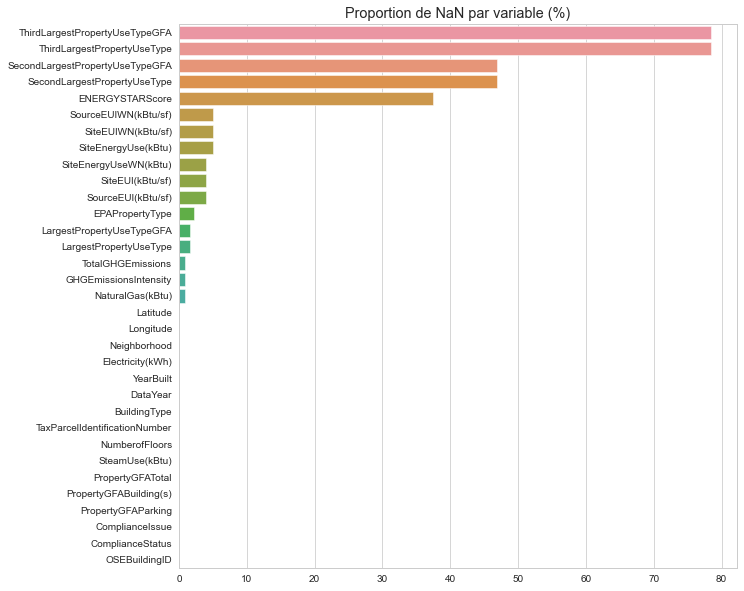

In [25]:
plt.figure(figsize=(10,10))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x=df_nan.values/data_m_final.shape[0]*100, y=df_nan.index)

**Comme nous avons conservé les deux années, nous avons des lignes en double.**


In [26]:
data_m_final['OSEBuildingID'].value_counts().head()

49865    2
21182    2
21321    2
24700    2
19565    2
Name: OSEBuildingID, dtype: int64

## Visualisations préliminaires


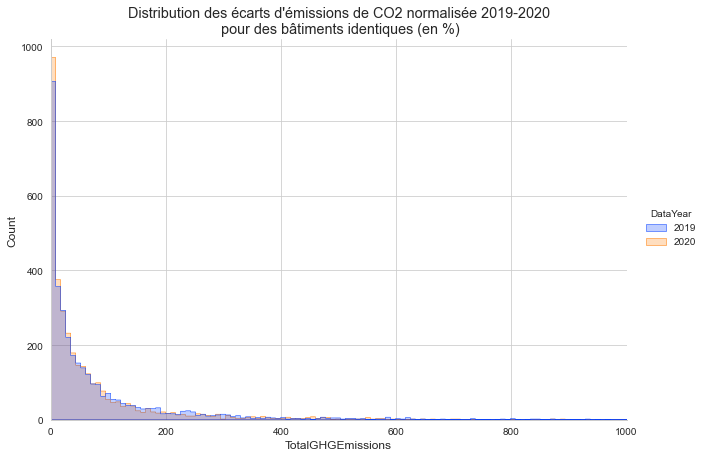

In [27]:
col_dbl = ['OSEBuildingID','DataYear','SiteEnergyUse(kBtu)','TotalGHGEmissions']
dbleBat = data_m[col_dbl].groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID')
ghg = sns.displot(dbleBat, x='TotalGHGEmissions', hue='DataYear',  
            element="step", palette='bright', height=6, aspect=1.5)
plt.xlim(0,1000)
ghg.set(title="Distribution des écarts d'émissions de CO2 normalisée 2019-2020\n pour des bâtiments identiques (en %)")

On note une petite progression des emissions CO2 en 2020 par rapport à l'année 2019

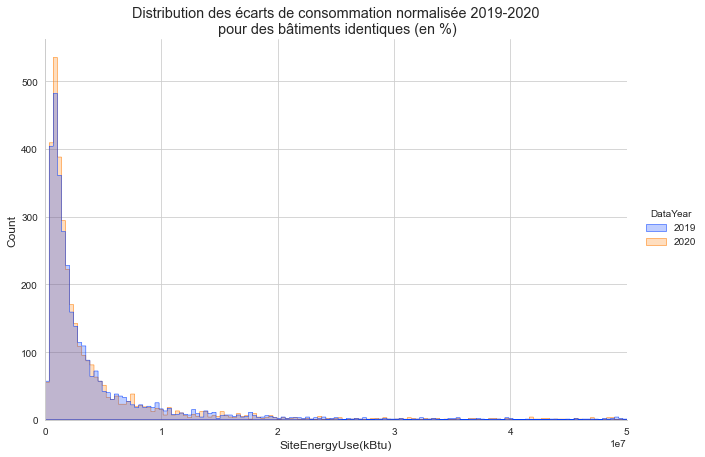

In [28]:
seu=sns.displot(dbleBat, x='SiteEnergyUse(kBtu)', hue='DataYear',  
            element="step", palette='bright', height=6, aspect=1.5)
plt.xlim(0,0.5e8)
seu.set(title="Distribution des écarts de consommation normalisée 2019-2020\n pour des bâtiments identiques (en %)")

Ici aussi, l'on note une progression en consommation d'energie en 2020 par rapport à 2019. La progression evolue dans le même que celle des émissions CO2

In [29]:
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

### On recupère les variables qualitatives à part et celles quantitatives à part dans l'optique de faire analyses descriptives

In [30]:
objectColumns = list(data_m_final.dtypes[data_m.dtypes == np.object].index)
numericColumns = list(data_m_final.dtypes[data_m.dtypes != np.object].index)
#print(objectColumns)
print(numericColumns)

['OSEBuildingID', 'DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


### Ce code permet de voir le nombre de modalités de chaque obect colum

In [31]:
for column in objectColumns:
    print('{}: {} uniques values'.format(column,len(data_m[column].unique())))

BuildingType: 8 uniques values
TaxParcelIdentificationNumber: 3553 uniques values
Neighborhood: 21 uniques values
LargestPropertyUseType: 65 uniques values
SecondLargestPropertyUseType: 58 uniques values
ThirdLargestPropertyUseType: 51 uniques values
EPAPropertyType: 68 uniques values
ComplianceStatus: 3 uniques values
ComplianceIssue: 7 uniques values


## Select the columns (float) in order to plot their distribution


In [32]:
col_data = data_m_final[['GHGEmissionsIntensity', 'TotalGHGEmissions', 'ENERGYSTARScore', 'NaturalGas(kBtu)']]


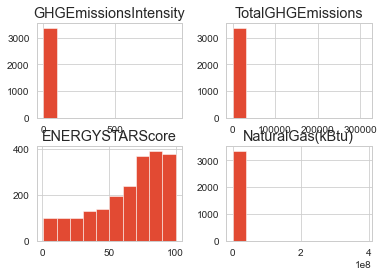

In [33]:
col_data.hist()
plt.show()

## Nombre de batiments par type

<Figure size 1800x1800 with 0 Axes>

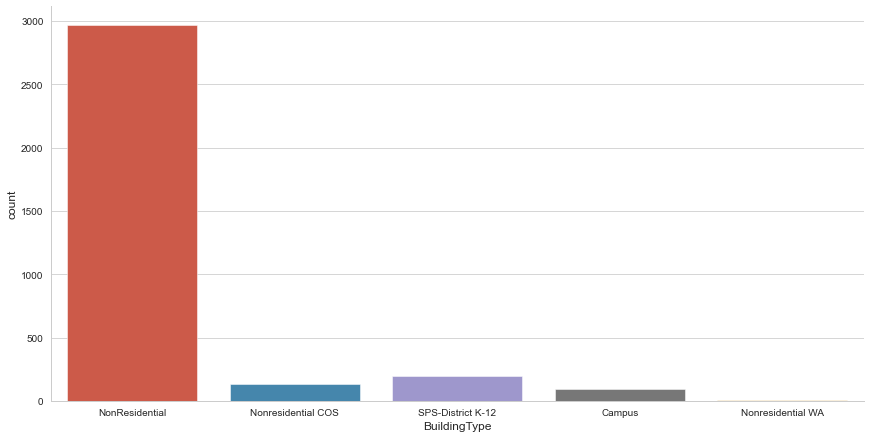

In [34]:
plt.figure(figsize=(25,25))
sns.catplot(x="BuildingType", kind="count",height=6, aspect=2,data=data_m_final)

Les non Residentials sont les plus nombreux

#### NonResidentials buildings are higher in GHGEmissions (for graph below)

<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

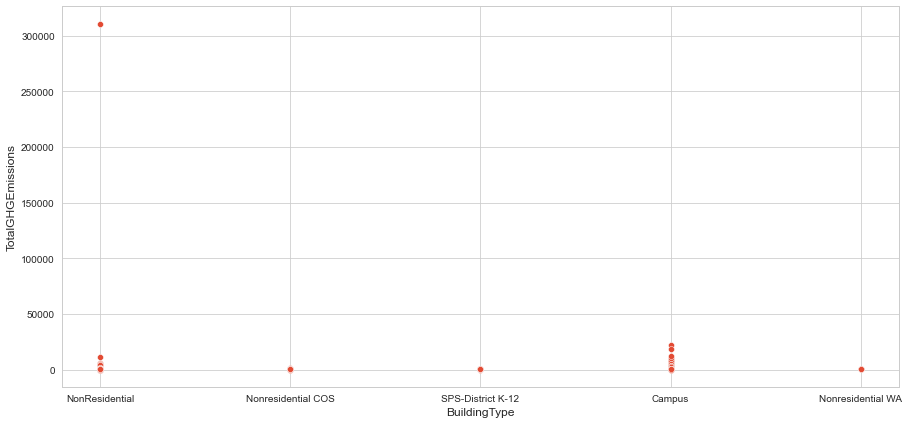

In [35]:
plt.figure(figsize=(15,7))
#data_m["TotalGHGEmissions"]=(data_m["TotalGHGEmissions"]-data_m["TotalGHGEmissions"].mean())/data_m["TotalGHGEmissions"].std()
sns.scatterplot(x=data_m_final['BuildingType'], y=data_m_final['TotalGHGEmissions'])

On remarque ci-dessous qu'avec GHGEmissionsIntensity,les NonResidentials ont emis beaucoup de CO2 par rapport aux autres

<AxesSubplot:xlabel='BuildingType', ylabel='GHGEmissionsIntensity'>

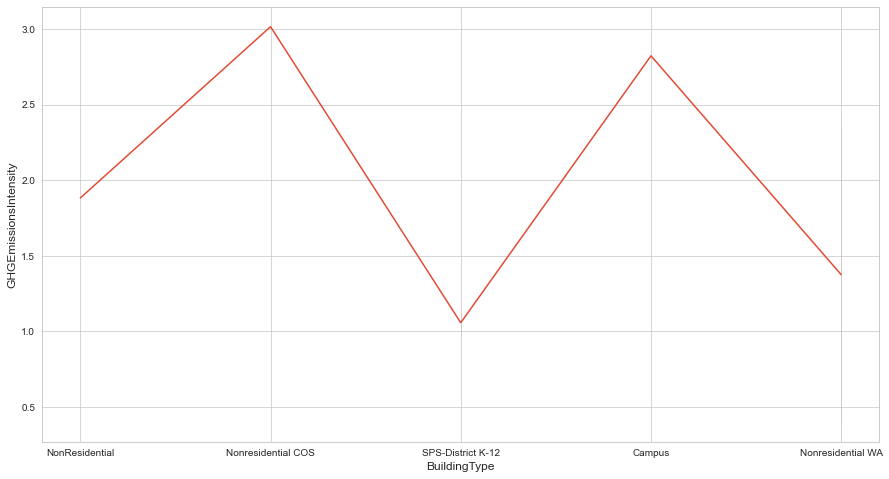

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(x='BuildingType',y='GHGEmissionsIntensity', data=data_m_final)

# Certaines anomalies dans les données

#### Surface de parking negatives

In [37]:
data_m_final[data_m_final['PropertyGFAParking']<0]

OSEBuildingID  DataYear    BuildingType TaxParcelIdentificationNumber  \
3272          49970      2019  NonResidential                    1625049001   
3243          49970      2020  NonResidential                    1625049001   

      Latitude  Longitude Neighborhood  YearBuilt  NumberofFloors  \
3272  47.65718 -122.31632    NORTHEAST       2011               0   
3243  47.65718 -122.31632    NORTHEAST       2011               0   

      PropertyGFATotal  ...  ThirdLargestPropertyUseType  \
3272            176225  ...                          NaN   
3243            176225  ...                          NaN   

      ThirdLargestPropertyUseTypeGFA  Electricity(kWh)  SteamUse(kBtu)  \
3272                             NaN           1034655               0   
3243                             NaN            922524               0   

               EPAPropertyType  ComplianceStatus  ComplianceIssue  \
3272  Residence Hall/Dormitory         Compliant         No Issue   
3243  Residence Hall/Dormitory         Compliant         No Issue   

      NaturalGas(kBtu)  TotalGHGEmissions GHGEmissionsIntensity  
3272         1714995.0              112.8                   0.6  
3243         1421892.0               92.3                   0.5  

[2 rows x 33 columns]

#### Un batiment n'a pas d'info sur sa consommation d'energie, rappel Source= Gas+Vapeur+Electricity

In [38]:

data_m_final[data_m_final['SourceEUI(kBtu/sf)']==0]

OSEBuildingID  DataYear    BuildingType TaxParcelIdentificationNumber  \
785          19876      2019  NonResidential                    0656000215   

     Latitude  Longitude Neighborhood  YearBuilt  NumberofFloors  \
785  47.61543 -122.34651     DOWNTOWN       1954               2   

     PropertyGFATotal  ...  ThirdLargestPropertyUseType  \
785             28696  ...                      Parking   

     ThirdLargestPropertyUseTypeGFA  Electricity(kWh)  SteamUse(kBtu)  \
785                          6080.0                 0               0   

        EPAPropertyType  ComplianceStatus  \
785  Mixed Use Property     Not Compliant   

                          ComplianceIssue  NaturalGas(kBtu)  \
785  Missing 2019 EUI or Electricity Data               0.0   

     TotalGHGEmissions GHGEmissionsIntensity  
785                0.0                   0.0  

[1 rows x 33 columns]

In [41]:
index_with_nan = data_m_final.index[data_m_final.isnull().any(axis=1)]

### suppressions des variables qui sont très peu renseignées, les imputer peut avoir des repercussions sur le modèle

In [39]:
#data_m_final.info()
col=(['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'])
data_m_final.drop(col, axis=1, inplace=True)

C:\Users\lenovo\AppData\Python\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### On verifie à nouveau les variables

In [40]:
data_m_final.isna().sum()
## Suppression de variables corrélées
#data_m_final.drop(['SiteEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)'], axis=1, inplace=True)

OSEBuildingID                       0
DataYear                            0
BuildingType                        0
TaxParcelIdentificationNumber       0
Latitude                            2
Longitude                           2
Neighborhood                        2
YearBuilt                           0
NumberofFloors                      0
PropertyGFATotal                    0
PropertyGFABuilding(s)              0
PropertyGFAParking                  0
ENERGYSTARScore                  1269
SiteEUIWN(kBtu/sf)                170
SiteEUI(kBtu/sf)                  137
SiteEnergyUse(kBtu)               170
SiteEnergyUseWN(kBtu)             137
SourceEUIWN(kBtu/sf)              170
SourceEUI(kBtu/sf)                137
LargestPropertyUseType             55
LargestPropertyUseTypeGFA          55
Electricity(kWh)                    0
SteamUse(kBtu)                      0
EPAPropertyType                    76
ComplianceStatus                    0
ComplianceIssue                     0
NaturalGas(k

##### Mis à part EnergyStarScore, au lieu de supprimer les données manquantes, je vais les imputer par la moyenne,  par ailleurs, il faut convertir certaines variables (kBtu) pour les rendre aux mêmes unités, rappel 1kWh--->3.412 kBtu

In [41]:
### Comme Electricité (kWh), on va convertir ces variables(kBtu) en kWh
data_m_final['NaturalGas(kWh)']=data_m_final['NaturalGas(kBtu)']/3.412
data_m_final['SourceEUI(kWh/sf)']=data_m_final['SourceEUI(kBtu/sf)']/3.412
data_m_final['SiteEnergyUse(kWh)']=data_m_final['SiteEnergyUse(kBtu)']/3.412


<ipython-input-41-20d665fd8cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['NaturalGas(kWh)']=data_m_final['NaturalGas(kBtu)']/3.412
<ipython-input-41-20d665fd8cb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['SourceEUI(kWh/sf)']=data_m_final['SourceEUI(kBtu/sf)']/3.412
<ipython-input-41-20d665fd8cb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [73]:
data_m_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3394 entries, 0 to 3625
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3394 non-null   int64  
 1   DataYear                       3394 non-null   int64  
 2   BuildingType                   3394 non-null   object 
 3   TaxParcelIdentificationNumber  3394 non-null   object 
 4   Latitude                       3392 non-null   float64
 5   Longitude                      3392 non-null   float64
 6   Neighborhood                   3392 non-null   object 
 7   YearBuilt                      3394 non-null   int64  
 8   NumberofFloors                 3394 non-null   int64  
 9   PropertyGFATotal               3394 non-null   int64  
 10  PropertyGFABuilding(s)         3394 non-null   int64  
 11  PropertyGFAParking             3394 non-null   int64  
 12  PrimaryPropertyType            1667 non-null   o

### Imputation par la moyenne

In [42]:
data_m_final['SourceEUI(kWh/sf)']=data_m_final['SourceEUI(kWh/sf)'].fillna(data_m_final['SourceEUI(kWh/sf)'].mean())
data_m_final['NaturalGas(kWh)']=data_m_final['NaturalGas(kWh)'].fillna(data_m_final['NaturalGas(kWh)'].mean())
data_m_final['TotalGHGEmissions']=data_m_final['TotalGHGEmissions'].fillna(data_m_final['TotalGHGEmissions'].mean())
data_m_final['GHGEmissionsIntensity']=data_m_final['GHGEmissionsIntensity'].fillna(data_m_final['GHGEmissionsIntensity'].mean())
data_m_final['SiteEnergyUse(kWh)']=data_m_final['SiteEnergyUse(kWh)'].fillna(data_m_final['SiteEnergyUse(kWh)'].mean())
data_m_final['SiteEUIWN(kBtu/sf)']=data_m_final['SiteEUIWN(kBtu/sf)'].fillna(data_m_final['SiteEUIWN(kBtu/sf)'].mean())
data_m_final['SiteEUI(kBtu/sf)']=data_m_final['SiteEUI(kBtu/sf)'].fillna(data_m_final['SiteEUI(kBtu/sf)'].mean())
data_m_final['SourceEUIWN(kBtu/sf)']=data_m_final['SourceEUIWN(kBtu/sf)'].fillna(data_m_final['SourceEUIWN(kBtu/sf)'].mean())
data_m_final['SiteEnergyUse(kBtu)']=data_m_final['SiteEnergyUse(kBtu)'].fillna(data_m_final['SiteEnergyUse(kBtu)'].mean())
data_m_final['SiteEnergyUseWN(kBtu)']=data_m_final['SiteEnergyUseWN(kBtu)'].fillna(data_m_final['SiteEnergyUseWN(kBtu)'].mean())
data_m_final['SourceEUI(kBtu/sf)']=data_m_final['SourceEUI(kBtu/sf)'].fillna(data_m_final['SourceEUI(kBtu/sf)'].mean())
data_m_final['NaturalGas(kBtu)']=data_m_final['NaturalGas(kBtu)'].fillna(data_m_final['NaturalGas(kBtu)'].mean())

#data_m_final.loc[,col_indexer] = value instead

<ipython-input-42-e67cd44bd76f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['SourceEUI(kWh/sf)']=data_m_final['SourceEUI(kWh/sf)'].fillna(data_m_final['SourceEUI(kWh/sf)'].mean())
<ipython-input-42-e67cd44bd76f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['NaturalGas(kWh)']=data_m_final['NaturalGas(kWh)'].fillna(data_m_final['NaturalGas(kWh)'].mean())
<ipython-input-42-e67cd44bd76f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Pour ENERGY STAR SCORE, je ne vais pas l'imputer. Elle contient beaucoup de données manquantes. Je ne vais pas l'utiliser dans mon modèle. Je vais le determiner à l'aide des estimations futures de SourceEUI. Pour avoir l'energie de la vapeur, on va la deduire du total energie consommée etant donné que nous avons les commations d'energie electrique et gaz

On veut aussi avoir l'information sur la consommation d'energie vapeur en Kwh

In [43]:
data_m_final['Steam(kWh)']=data_m_final['SiteEnergyUse(kWh)']-data_m_final['NaturalGas(kWh)']-data_m_final['Electricity(kWh)']

<ipython-input-43-cc381954a502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['Steam(kWh)']=data_m_final['SiteEnergyUse(kWh)']-data_m_final['NaturalGas(kWh)']-data_m_final['Electricity(kWh)']


## Correlation entre features

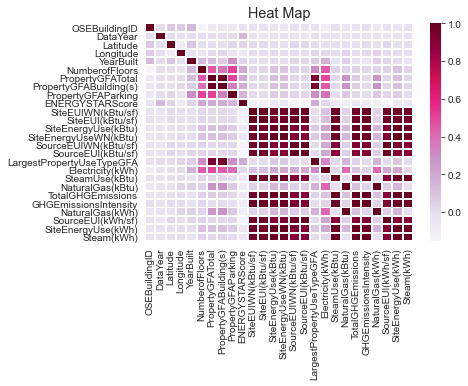

<Figure size 432x288 with 0 Axes>

In [44]:
sns.heatmap(data_m_final.corr(), xticklabels=True, yticklabels=True, linewidths=.9, cmap="PuRd")
plt.title("Heat Map")
plt.figure(figsize=None)
plt.show()

### On cherche à inspecter certaines variables très corrélées entre elles

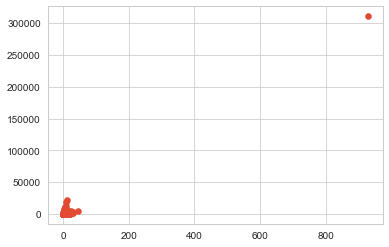

In [45]:
plt.scatter(data_m_final['GHGEmissionsIntensity'], data_m_final['TotalGHGEmissions'])
plt.show()

In [46]:
print("GHGEmissionsIntensity & TotalGHGEmissions")
print(pearsonr(data_m_final['GHGEmissionsIntensity'], data_m_final['TotalGHGEmissions']))
print("_"*100)
print("SiteEnergyUse(kWh) & SiteEnergyUse(kBtu) ")
print(pearsonr(data_m_final['SiteEnergyUse(kWh)'], data_m_final['SiteEnergyUse(kBtu)']))
print("_"*100)
print("SiteEnergyUse(kWh) & SiteEnergyUseWN(kBtu")
print(pearsonr(data_m_final['SiteEnergyUse(kWh)'], data_m_final['SiteEnergyUseWN(kBtu)']))
print("_"*100)
print("SourceEUI(kBtu/sf) & SourceEUI(kWh/sf) ")
print(pearsonr(data_m_final['SourceEUI(kBtu/sf)'], data_m_final['SourceEUI(kWh/sf)']))
print("_"*100)
print("SourceEUI(kBtu/sf) & SourceEUIWN(kBtu/sf)")
print(pearsonr(data_m_final['SourceEUI(kBtu/sf)'],data_m_final['SourceEUIWN(kBtu/sf)']))
print("_"*100)
print("SteamUse(kBtu) & Steam(kWh)")
print(pearsonr(data_m_final['SteamUse(kBtu)'], data_m_final['Steam(kWh)']))
print("_"*100)
print("SiteEUIWN(kBtu/sf) & SiteEUI(kBtu/sf)")
print(pearsonr(data_m_final['SiteEUIWN(kBtu/sf)'], data_m_final['SiteEUI(kBtu/sf)']))

## Certaines variables sont très corrélées, on va supprimer l'une d'entre elles

GHGEmissionsIntensity & TotalGHGEmissions
(0.9870498508871911, 0.0)
____________________________________________________________________________________________________
SiteEnergyUse(kWh) & SiteEnergyUse(kBtu) 
(0.9999999999999993, 0.0)
____________________________________________________________________________________________________
SiteEnergyUse(kWh) & SiteEnergyUseWN(kBtu
(0.9999025741054779, 0.0)
____________________________________________________________________________________________________
SourceEUI(kBtu/sf) & SourceEUI(kWh/sf) 
(0.9999999999999993, 0.0)
____________________________________________________________________________________________________
SourceEUI(kBtu/sf) & SourceEUIWN(kBtu/sf)
(0.9992849893728626, 0.0)
____________________________________________________________________________________________________
SteamUse(kBtu) & Steam(kWh)
(0.9997013413020686, 0.0)
____________________________________________________________________________________________________
Si

Nous allons supprimer TotalGHGEmissions,SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),TotalGHGEmissions

##### Ces variables précedentes sont deux à deux très corrélées.

In [ ]:
#### On va supprimer certaines d'entre elles

In [47]:
data_m_final.drop(['TotalGHGEmissions'], axis=1, inplace=True)
data_m_final.drop(['SiteEUIWN(kBtu/sf)'],axis=1, inplace=True)
data_m_final.drop(['SourceEUIWN(kBtu/sf)'],axis=1, inplace=True)
data_m_final.drop(['SourceEUI(kBtu/sf)'],axis=1, inplace=True)
data_m_final.drop(['SiteEnergyUseWN(kBtu)'],axis=1, inplace=True)
data_m_final.drop(['SiteEnergyUse(kBtu)'],axis=1, inplace=True)

## On regarde à nouveau les NA par feature

In [48]:
data_m_final.isna().sum()

OSEBuildingID                       0
DataYear                            0
BuildingType                        0
TaxParcelIdentificationNumber       0
Latitude                            2
Longitude                           2
Neighborhood                        2
YearBuilt                           0
NumberofFloors                      0
PropertyGFATotal                    0
PropertyGFABuilding(s)              0
PropertyGFAParking                  0
ENERGYSTARScore                  1269
SiteEUI(kBtu/sf)                    0
LargestPropertyUseType             55
LargestPropertyUseTypeGFA          55
Electricity(kWh)                    0
SteamUse(kBtu)                      0
EPAPropertyType                    76
ComplianceStatus                    0
ComplianceIssue                     0
NaturalGas(kBtu)                    0
GHGEmissionsIntensity               0
NaturalGas(kWh)                     0
SourceEUI(kWh/sf)                   0
SiteEnergyUse(kWh)                  0
Steam(kWh)  

### Imputation par le mode, pour les variables de type object

In [49]:
data_m_final['LargestPropertyUseType']=data_m_final['LargestPropertyUseType'].fillna(data_m_final['LargestPropertyUseType'].mode())
data_m_final['LargestPropertyUseTypeGFA']=data_m_final['LargestPropertyUseTypeGFA'].fillna(data_m_final['LargestPropertyUseTypeGFA'].mean())
data_m_final['EPAPropertyType']=data_m_final['EPAPropertyType'].fillna(data_m_final['EPAPropertyType'].mode())


<ipython-input-49-0b3f7e1faa3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['LargestPropertyUseType']=data_m_final['LargestPropertyUseType'].fillna(data_m_final['LargestPropertyUseType'].mode())
<ipython-input-49-0b3f7e1faa3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['LargestPropertyUseTypeGFA']=data_m_final['LargestPropertyUseTypeGFA'].fillna(data_m_final['LargestPropertyUseTypeGFA'].mean())
<ipython-input-49-0b3f7e1faa3b>:3: SettingWithCopyWarning: 
A value is trying

## Analyse Exploratoire

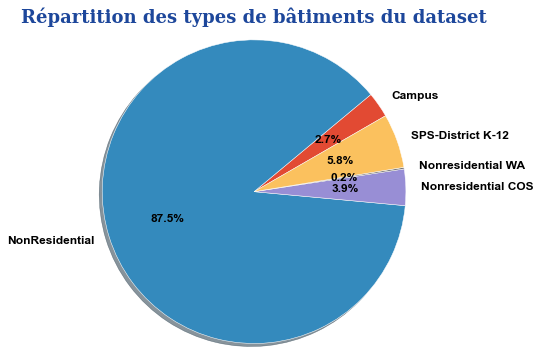

In [50]:

building_type = data_m_final.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du dataset", fontdict=font_title)
plt.show()

In [83]:
data_m_final['BuildingType'].value_counts()

NonResidential        2967
SPS-District K-12      198
Nonresidential COS     133
Campus                  92
Nonresidential WA        4
Name: BuildingType, dtype: int64

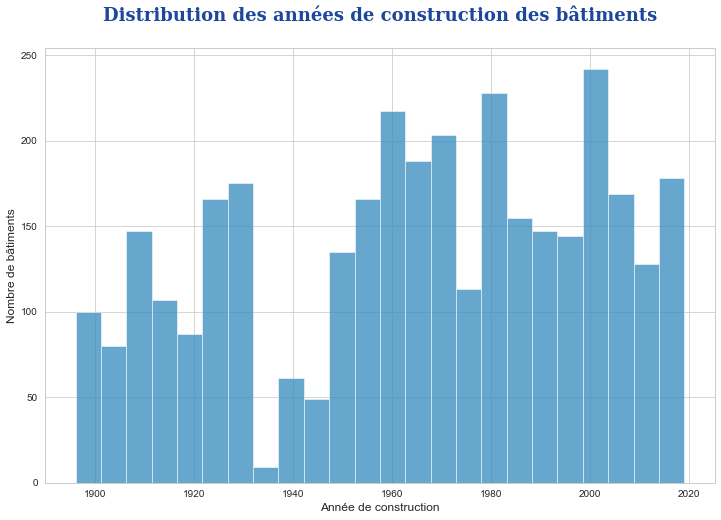

In [51]:
#Nous allons regarder les distribution des années de construction des bâtiments de Seattle :
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data_m_final, x='YearBuilt', bins=int((data_m_final.YearBuilt.max() - data_m_final.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

### Plus que l'année de construction, il serait intéressant de traiter l'âge des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :


<ipython-input-52-87bd98ad118a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_final['BuildingAge'] = data_m_final['DataYear'] - data_m_final['YearBuilt']


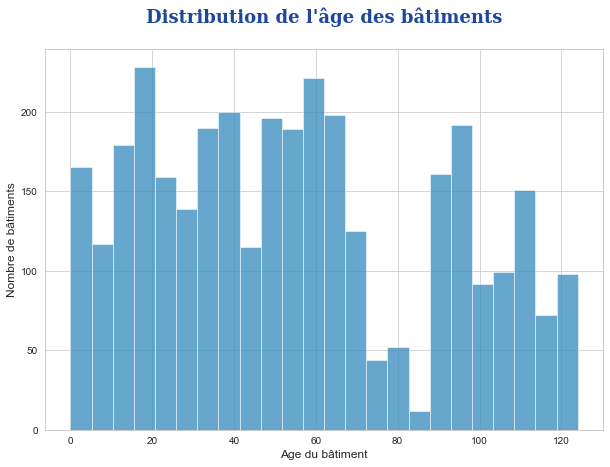

In [52]:

data_m_final['BuildingAge'] = data_m_final['DataYear'] - data_m_final['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=data_m_final, x='BuildingAge', bins=int((data_m_final.BuildingAge.max() - data_m_final.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

## Recherche de valeurs abbérantes et traitement

In [53]:
#Examinons la distribution de quelques variables
var_to_hist = ['YearBuilt','PropertyGFATotal','SourceEUI(kWh/sf)','GHGEmissionsIntensity', 'NaturalGas(kWh)','Steam(kWh)','Electricity(kWh)']

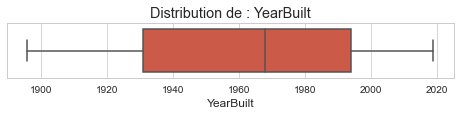

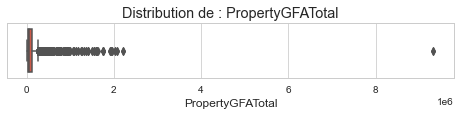

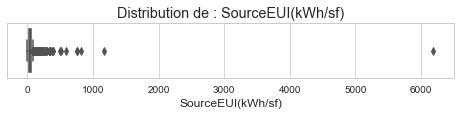

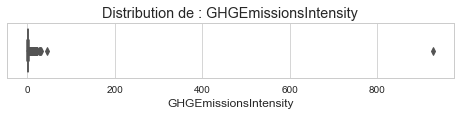

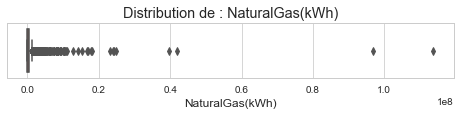

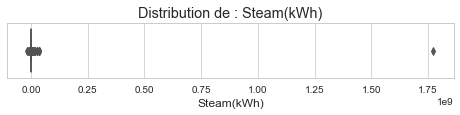

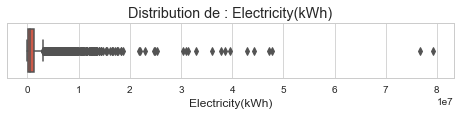

In [54]:
for column in var_to_hist:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=data_m_final[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

#### On pourrait soupçonner l'existence des valeurs extrèmes. On va diagnostiquer leur présence

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

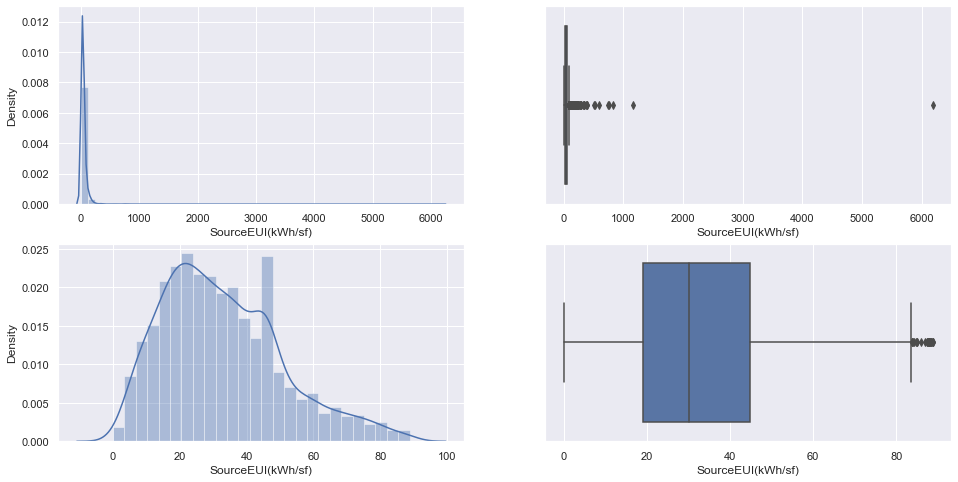

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

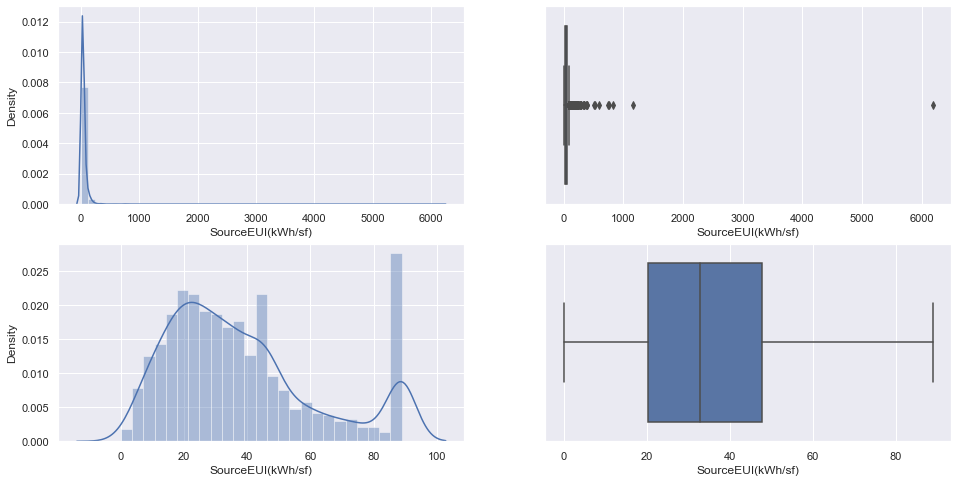

In [55]:
### Finding IQR
percentile25 = data_m_final['SourceEUI(kWh/sf)'].quantile(0.25)
percentile75 = data_m_final['SourceEUI(kWh/sf)'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
data_m_final[data_m_final['SourceEUI(kWh/sf)'] > upper_limit] ##318 repérées comme outliers
data_m_final[data_m_final['SourceEUI(kWh/sf)'] < lower_limit]

# Trimming, on corrige

new_data = data_m_final[data_m_final['SourceEUI(kWh/sf)'] < upper_limit]
new_data.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['SourceEUI(kWh/sf)'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['SourceEUI(kWh/sf)'])
plt.subplot(2,2,3)
sns.distplot(new_data['SourceEUI(kWh/sf)'])
plt.subplot(2,2,4)
sns.boxplot(new_data['SourceEUI(kWh/sf)'])
plt.show()

### Capping
new_data_cap1 = data_m_final.copy()
new_data_cap1['SourceEUI(kWh/sf)'] = np.where(
    new_data_cap1['SourceEUI(kWh/sf)'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap1['SourceEUI(kWh/sf)'] < lower_limit,
        lower_limit,
        new_data_cap1['SourceEUI(kWh/sf)']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['SourceEUI(kWh/sf)'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['SourceEUI(kWh/sf)'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap1['SourceEUI(kWh/sf)'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap1['SourceEUI(kWh/sf)'])
plt.show()

### Il elimine les outliers

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

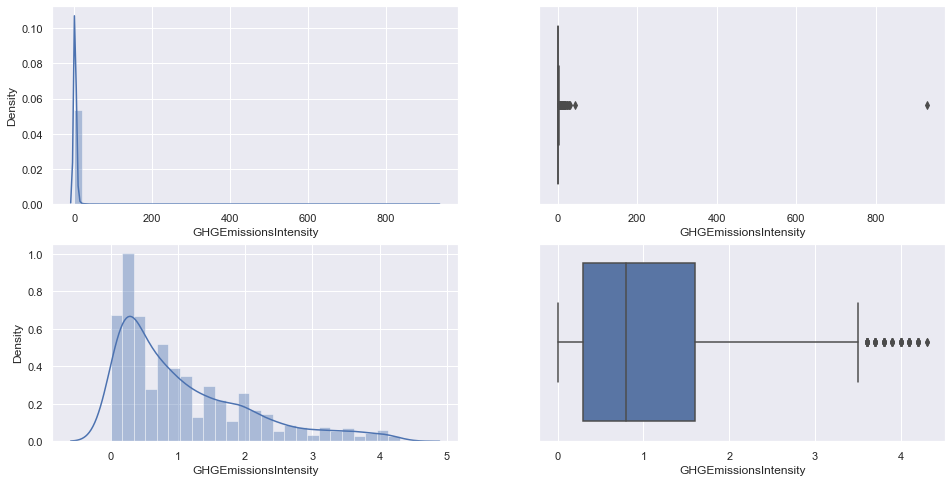

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

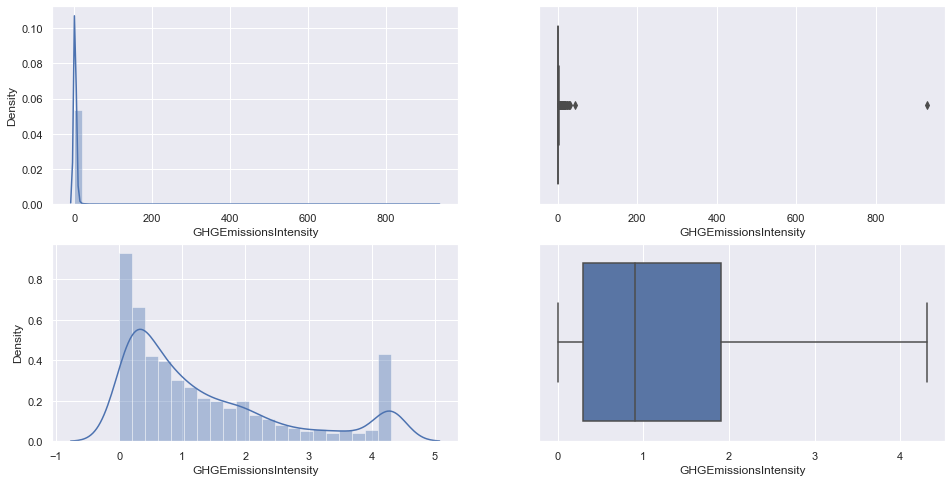

In [56]:
###GHGEmissionsIntensity
### Finding IQR
percentile25 = new_data_cap1['GHGEmissionsIntensity'].quantile(0.25)
percentile75 = new_data_cap1['GHGEmissionsIntensity'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
new_data_cap1[new_data_cap1['GHGEmissionsIntensity'] > upper_limit] ## 284 reperées comme outliers
#data_m_final[data_m_final['GHGEmissionsIntensity'] < lower_limit]

# Trimming, on corrige

new_data1= new_data_cap1[new_data_cap1['GHGEmissionsIntensity'] < upper_limit]
new_data1.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data_cap1['GHGEmissionsIntensity'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap1['GHGEmissionsIntensity'])
plt.subplot(2,2,3)
sns.distplot(new_data1['GHGEmissionsIntensity'])
plt.subplot(2,2,4)
sns.boxplot(new_data1['GHGEmissionsIntensity'])
plt.show()

### Capping
new_data_cap2 = new_data_cap1.copy()
new_data_cap2['GHGEmissionsIntensity'] = np.where(
    new_data_cap2['GHGEmissionsIntensity'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap2['GHGEmissionsIntensity'] < lower_limit,
        lower_limit,
        new_data_cap2['GHGEmissionsIntensity']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['GHGEmissionsIntensity'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['GHGEmissionsIntensity'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap2['GHGEmissionsIntensity'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap2['GHGEmissionsIntensity'])
plt.show()

#### Il renvoie des avertissements sur le displot qui est  ancien et qui risquerai d'etre supprimé. Il recommande displot
### Il elimine les outliers

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

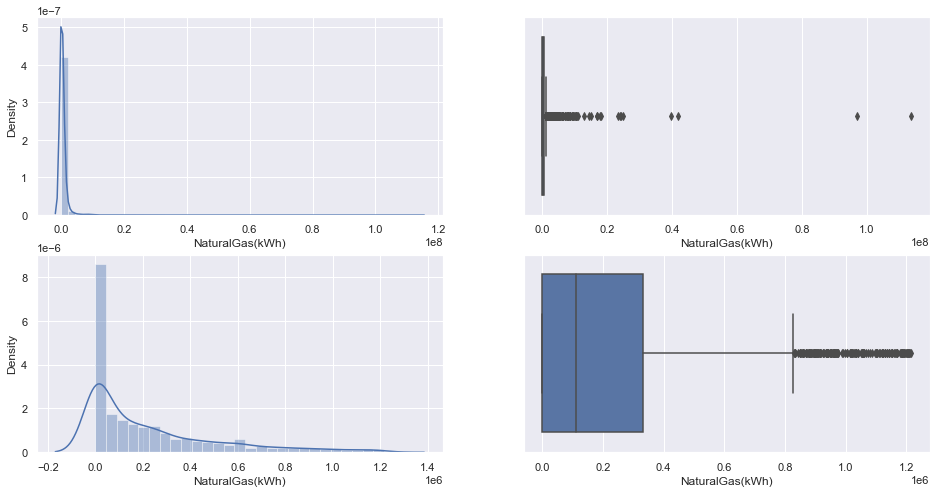

C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function fo

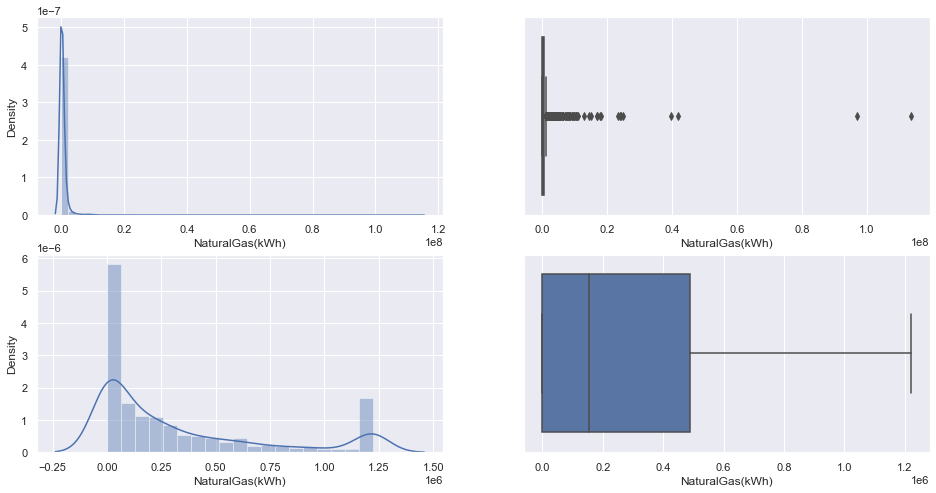

In [59]:
###NaturalGas(kBtu)

### Finding IQR
percentile25 = data_m_final['NaturalGas(kWh)'].quantile(0.25)
percentile75 = data_m_final['NaturalGas(kWh)'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
data_m_final[data_m_final['NaturalGas(kWh)'] > upper_limit] ## 343 outliers
#data_m_final[data_m_final['NaturalGas(kBtu)'] < lower_limit]

# Trimming, on corrige

new_data2= new_data_cap2[new_data_cap2['NaturalGas(kWh)'] < upper_limit]
new_data2.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data_cap2['NaturalGas(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap2['NaturalGas(kWh)'])
plt.subplot(2,2,3)
sns.distplot(new_data2['NaturalGas(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data2['NaturalGas(kWh)'])
plt.show()

### Capping
new_data_cap3= new_data_cap2.copy()
new_data_cap3['NaturalGas(kWh)'] = np.where(
    new_data_cap3['NaturalGas(kWh)'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap3['NaturalGas(kWh)'] < lower_limit,
        lower_limit,
        new_data_cap3['NaturalGas(kWh)']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['NaturalGas(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['NaturalGas(kWh)'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap3['NaturalGas(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap3['NaturalGas(kWh)'])
plt.show()


In [ ]:
###SteamUse(kBtu)

### Finding IQR
percentile25 = data_m_final['Steam(kWh)'].quantile(0.25)
percentile75 = data_m_final['Steam(kWh)'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
data_m_final[data_m_final['Steam(kWh)'] > upper_limit] ## 237 outliers
#data_m_final[data_m_final['NaturalGas(kBtu)'] < lower_limit]

# Trimming, on corrige

new_data3= new_data_cap3[new_data_cap3['Steam(kWh)'] < upper_limit]
new_data3.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(new_data_cap3['Steam(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap3['Steam(kWh)'])
plt.subplot(2,2,3)
sns.displot(new_data3['Steam(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data3['Steam(kWh)'])
plt.show()

### Capping
new_data_cap4= new_data_cap3.copy()
new_data_cap4['Steam(kWh)'] = np.where(
    new_data_cap4['Steam(kWh)'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap4['Steam(kWh)'] < lower_limit,
        lower_limit,
        new_data_cap4['Steam(kWh)']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(data_m_final['Steam(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['Steam(kWh)'])
plt.subplot(2,2,3)
sns.displot(new_data_cap4['Steam(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap4['Steam(kWh)'])
plt.show()


In [ ]:
###Electricity(kWh)

### Finding IQR
percentile25 = data_m_final['Electricity(kWh)'].quantile(0.25)
percentile75 = data_m_final['Electricity(kWh)'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
data_m_final[data_m_final['Electricity(kWh)'] > upper_limit] ## 401 outliers
#data_m_final[data_m_final['NaturalGas(kBtu)'] < lower_limit]

# Trimming, on corrige

new_data4= new_data_cap4[new_data_cap4['Electricity(kWh)'] < upper_limit]
new_data3.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data_cap4['Electricity(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap4['Electricity(kWh)'])
plt.subplot(2,2,3)
sns.distplot(new_data4['Electricity(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data4['Electricity(kWh)'])
plt.show()

### Capping
new_data_cap5 = new_data_cap4.copy()
new_data_cap5['Electricity(kWh)'] = np.where(
    new_data_cap5['Electricity(kWh)'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap5['Electricity(kWh)'] < lower_limit,
        lower_limit,
        new_data_cap5['Electricity(kWh)']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['Electricity(kWh)'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['Electricity(kWh)'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap5['Electricity(kWh)'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap5['Electricity(kWh)'])
plt.show()

In [ ]:
###Electricity(kWh)

### Finding IQR
percentile25 = data_m_final['PropertyGFATotal'].quantile(0.25)
percentile75 = data_m_final['PropertyGFATotal'].quantile(0.75)
### Interquartile distance
iqr=percentile75-percentile25
##Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##Finding Outliers
data_m_final[data_m_final['PropertyGFATotal'] > upper_limit] ## 401 outliers
#data_m_final[data_m_final['NaturalGas(kBtu)'] < lower_limit]

# Trimming, on corrige

new_data5= new_data_cap4[new_data_cap4['PropertyGFATotal'] < upper_limit]
new_data5.shape

## Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data_cap4['PropertyGFATotal'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap4['PropertyGFATotal'])
plt.subplot(2,2,3)
sns.distplot(new_data5['PropertyGFATotal'])
plt.subplot(2,2,4)
sns.boxplot(new_data5['PropertyGFATotal'])
plt.show()

### Capping
new_data_cap6 = new_data_cap5.copy()
new_data_cap6['PropertyGFATotal'] = np.where(
    new_data_cap6['PropertyGFATotal'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap6['PropertyGFATotal'] < lower_limit,
        lower_limit,
        new_data_cap6['PropertyGFATotal']
    )
)

#### Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_m_final['PropertyGFATotal'])
plt.subplot(2,2,2)
sns.boxplot(data_m_final['PropertyGFATotal'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap6['PropertyGFATotal'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap6['PropertyGFATotal'])
plt.show()

In [101]:
data_m_final['GHGEmissionsIntensity'].describe()

count    3394.000000
mean        1.903031
std        16.083847
min         0.000000
25%         0.300000
50%         0.900000
75%         1.903031
max       927.700000
Name: GHGEmissionsIntensity, dtype: float64

### Pas d'outliers sur les variables ciblées

In [102]:

for column in var_to_hist:
    plt.figure(figsize = (8,1))
  #  
    sns.boxplot(x=new_data_cap6[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

NameError: name 'new_data_cap6' is not defined

<Figure size 576x72 with 0 Axes>

In [203]:
new_data_cap6.info()
#data_m_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3394 entries, 0 to 3625
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  3394 non-null   int64  
 1   DataYear                       3394 non-null   int64  
 2   BuildingType                   3394 non-null   object 
 3   TaxParcelIdentificationNumber  3394 non-null   object 
 4   Latitude                       3392 non-null   float64
 5   Longitude                      3392 non-null   float64
 6   Neighborhood                   3392 non-null   object 
 7   YearBuilt                      3394 non-null   int64  
 8   NumberofFloors                 3394 non-null   int64  
 9   PropertyGFATotal               3394 non-null   float64
 10  PropertyGFABuilding(s)         3394 non-null   int64  
 11  PropertyGFAParking             3394 non-null   int64  
 12  ENERGYSTARScore                2125 non-null   f

## This function allows you to view the distribution of CO2 emissions within the classes of a variable.

In [205]:

def visualisation(variable,new_data_cap6):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=new_data_cap6["GHGEmissionsIntensity"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("C02 emissions distribution by {}".format(variable),size=16)
    sns.boxplot(x=variable, y="GHGEmissionsIntensity", data=new_data_cap6,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(new_data_cap6[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel(" C02 emissions",size=14)
    plt.xticks(range(0,len(new_data_cap6[variable].unique()))
               ,new_data_cap6[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

### Emissions CO2 par quartiers de Seattle

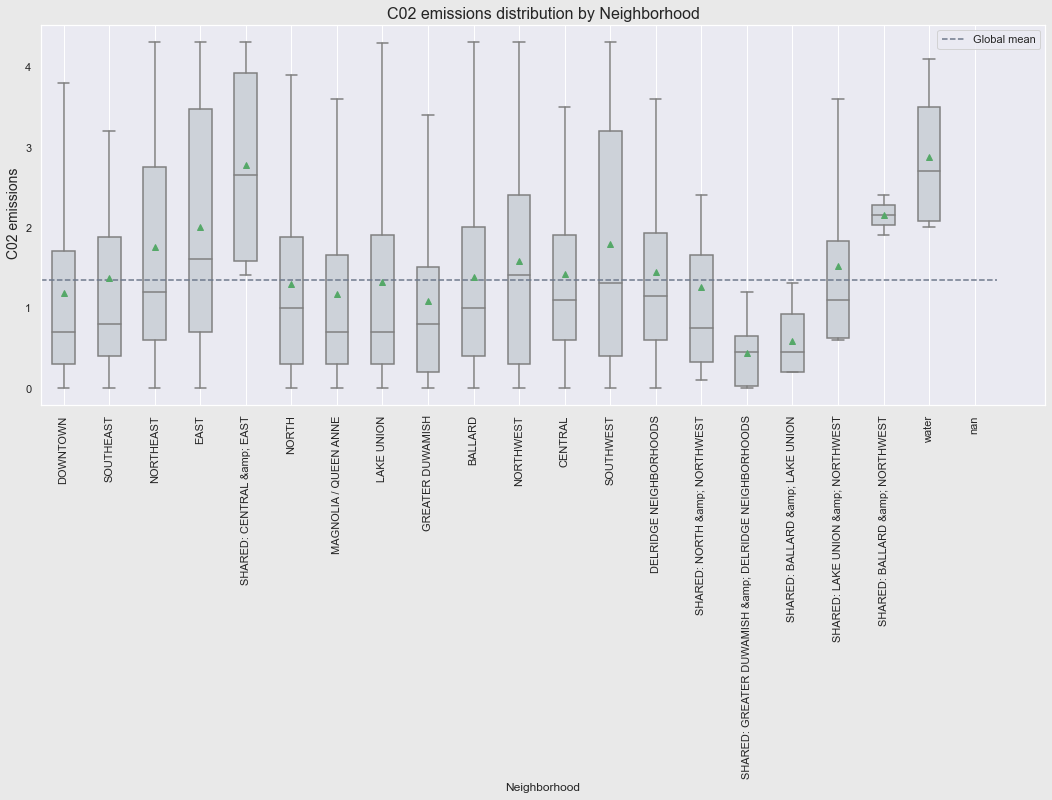

In [206]:
visualisation('Neighborhood',new_data_cap6)

### Emissions de CO2 suivant le type de Bâtiments

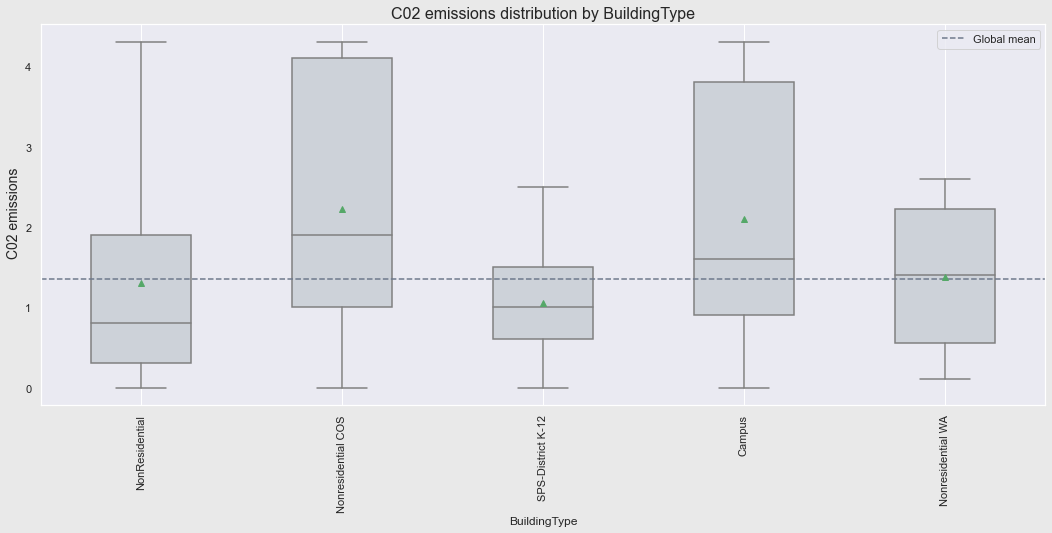

In [207]:
visualisation('BuildingType',new_data_cap6)

### Afin de choisir des variables pour notre prochain modèle, regardons la corrélation linéaire

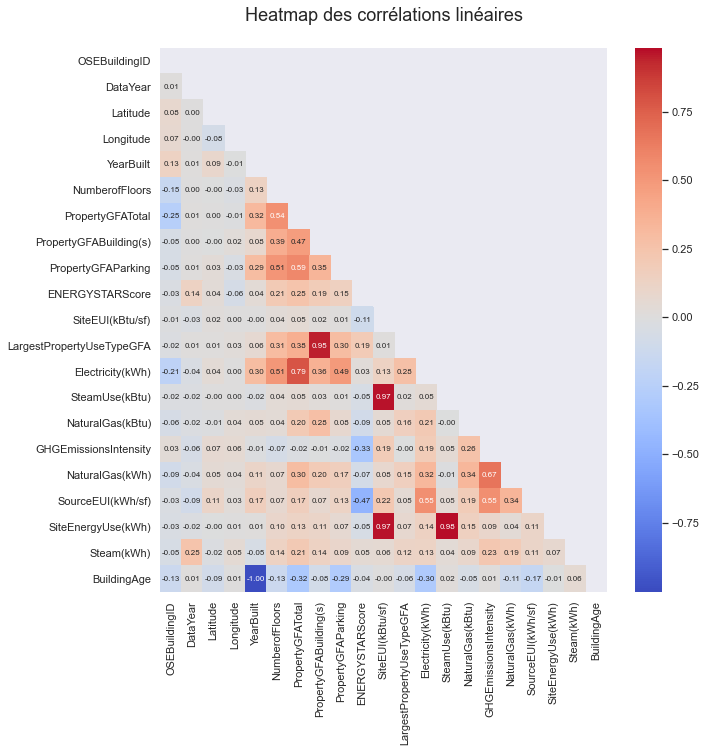

In [208]:
### Corrélation linéaire

corr = new_data_cap6.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [248]:
threshold = 0.3
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                    level_1  corr_coeff
60          SteamUse(kBtu)         SiteEnergyUse(kWh)    0.982153
58          SteamUse(kBtu)           SiteEUI(kBtu/sf)    0.970770
56      SiteEnergyUse(kWh)           SiteEUI(kBtu/sf)    0.967813
54  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA    0.953314
52        Electricity(kWh)           PropertyGFATotal    0.792244
50        PropertyGFATotal  LargestPropertyUseTypeGFA    0.686789
48   GHGEmissionsIntensity            NaturalGas(kWh)    0.678945
46          NumberofFloors  LargestPropertyUseTypeGFA    0.667708
44        PropertyGFATotal     PropertyGFABuilding(s)    0.667586
42  PropertyGFABuilding(s)             NumberofFloors    0.625672
40      PropertyGFAParking  LargestPropertyUseTypeGFA    0.624476
38        Electricity(kWh)  LargestPropertyUseTypeGFA    0.601624
36      PropertyGFAParking           PropertyGFATotal    0.592012
34        Electricity(kWh)     PropertyGFABuilding(s)    0.583139
32        PropertyGFATotal             NumberofFloors    0.556496
30       SourceEUI(kWh/sf)           Electricity(kWh)    0.555877
28  PropertyGFABuilding(s)         PropertyGFAParking    0.549622
26       SourceEUI(kWh/sf)      GHGEmissionsIntensity    0.548880
24      PropertyGFAParking             NumberofFloors    0.524981
22          NumberofFloors           Electricity(kWh)    0.521211
20      PropertyGFAParking           Electricity(kWh)    0.492667
18  PropertyGFABuilding(s)           NaturalGas(kBtu)    0.386729
16             GFAPerFloor           PropertyGFATotal    0.360411
14       SourceEUI(kWh/sf)            NaturalGas(kWh)    0.343845
12         NaturalGas(kWh)           NaturalGas(kBtu)    0.331411
10        Electricity(kWh)            NaturalGas(kWh)    0.319051
8         PropertyGFATotal                  YearBuilt    0.318978
6              BuildingAge           PropertyGFATotal   -0.318853
4          ENERGYSTARScore      GHGEmissionsIntensity   -0.330198
2          ENERGYSTARScore          SourceEUI(kWh/sf)   -0.468919
0                YearBuilt                BuildingAge   -0.999893

Les trois premières corrélations sont évidentes, en effet chacune des trois variables resulte de l'autre.
La variable à prédire SourceEUI est très corrélée aux GHGEmissionsIntensity, NaturalsGAZ, Electricity. BuildingAge
GHGEmissions est corrélée à SourceEUI, Electricity, NaturalGaz.
Les fortes corrélations visibles sur le heatmap peuvent amener des problèmes de colinéarité 
dans nos futurs modèles. Isolons donc les paires de variables avec des corrélations de Pearson supérieurs à 0.7 :

In [249]:
#On complète les usages de la partie la plus large
new_data_cap6['LargestPropertyUseType'] = new_data_cap6['LargestPropertyUseType'].fillna("Unknown")
new_data_cap6['EPAPropertyType'] = new_data_cap6['EPAPropertyType'].fillna("Unknown")
new_data_cap6['Neighborhood'] = new_data_cap6['Neighborhood'].fillna("Unknown")


In [250]:
### On supprime des valeurs incorrectes
clean_data1=new_data_cap6[new_data_cap6['NumberofFloors']>0]


In [251]:
#Nous pouvons également calculer la surface moyenne par bâtiment et par étage :
clean_data1['GFAPerFloor'] = round((clean_data1['PropertyGFATotal'] / clean_data1['NumberofFloors']),2)

<ipython-input-251-bd87bc7823b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['GFAPerFloor'] = round((clean_data1['PropertyGFATotal'] / clean_data1['NumberofFloors']),2)


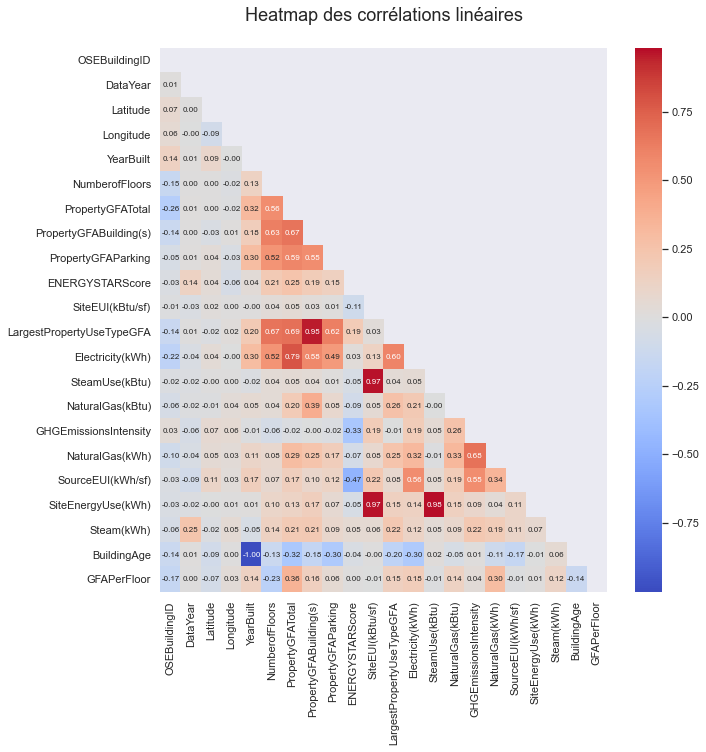

In [252]:
##Vérifions l'impact de ce feature engineering sur la matrice des corrélations linéaires :
corr = clean_data1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [254]:
threshold_up = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                    level_1  corr_coeff
10          SteamUse(kBtu)         SiteEnergyUse(kWh)    0.982153
8           SteamUse(kBtu)           SiteEUI(kBtu/sf)    0.970770
6       SiteEnergyUse(kWh)           SiteEUI(kBtu/sf)    0.967813
4   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA    0.953314
2         Electricity(kWh)           PropertyGFATotal    0.792244
0                YearBuilt                BuildingAge   -0.999893

In [255]:
building_types = sorted(clean_data1['BuildingType'].unique())
display(building_types)
display(len(building_types))


['Campus',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12']

5

### Matrice de plots

In [220]:
corr = clean_data1.corr()
corr_columns = corr.columns[((corr < 1) & (corr > 0.6)).any(axis=0)]
display(corr_columns)

Index(['NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SiteEUI(kBtu/sf)', 'LargestPropertyUseTypeGFA',
       'Electricity(kWh)', 'SteamUse(kBtu)', 'GHGEmissionsIntensity',
       'NaturalGas(kWh)', 'SiteEnergyUse(kWh)'],
      dtype='object')

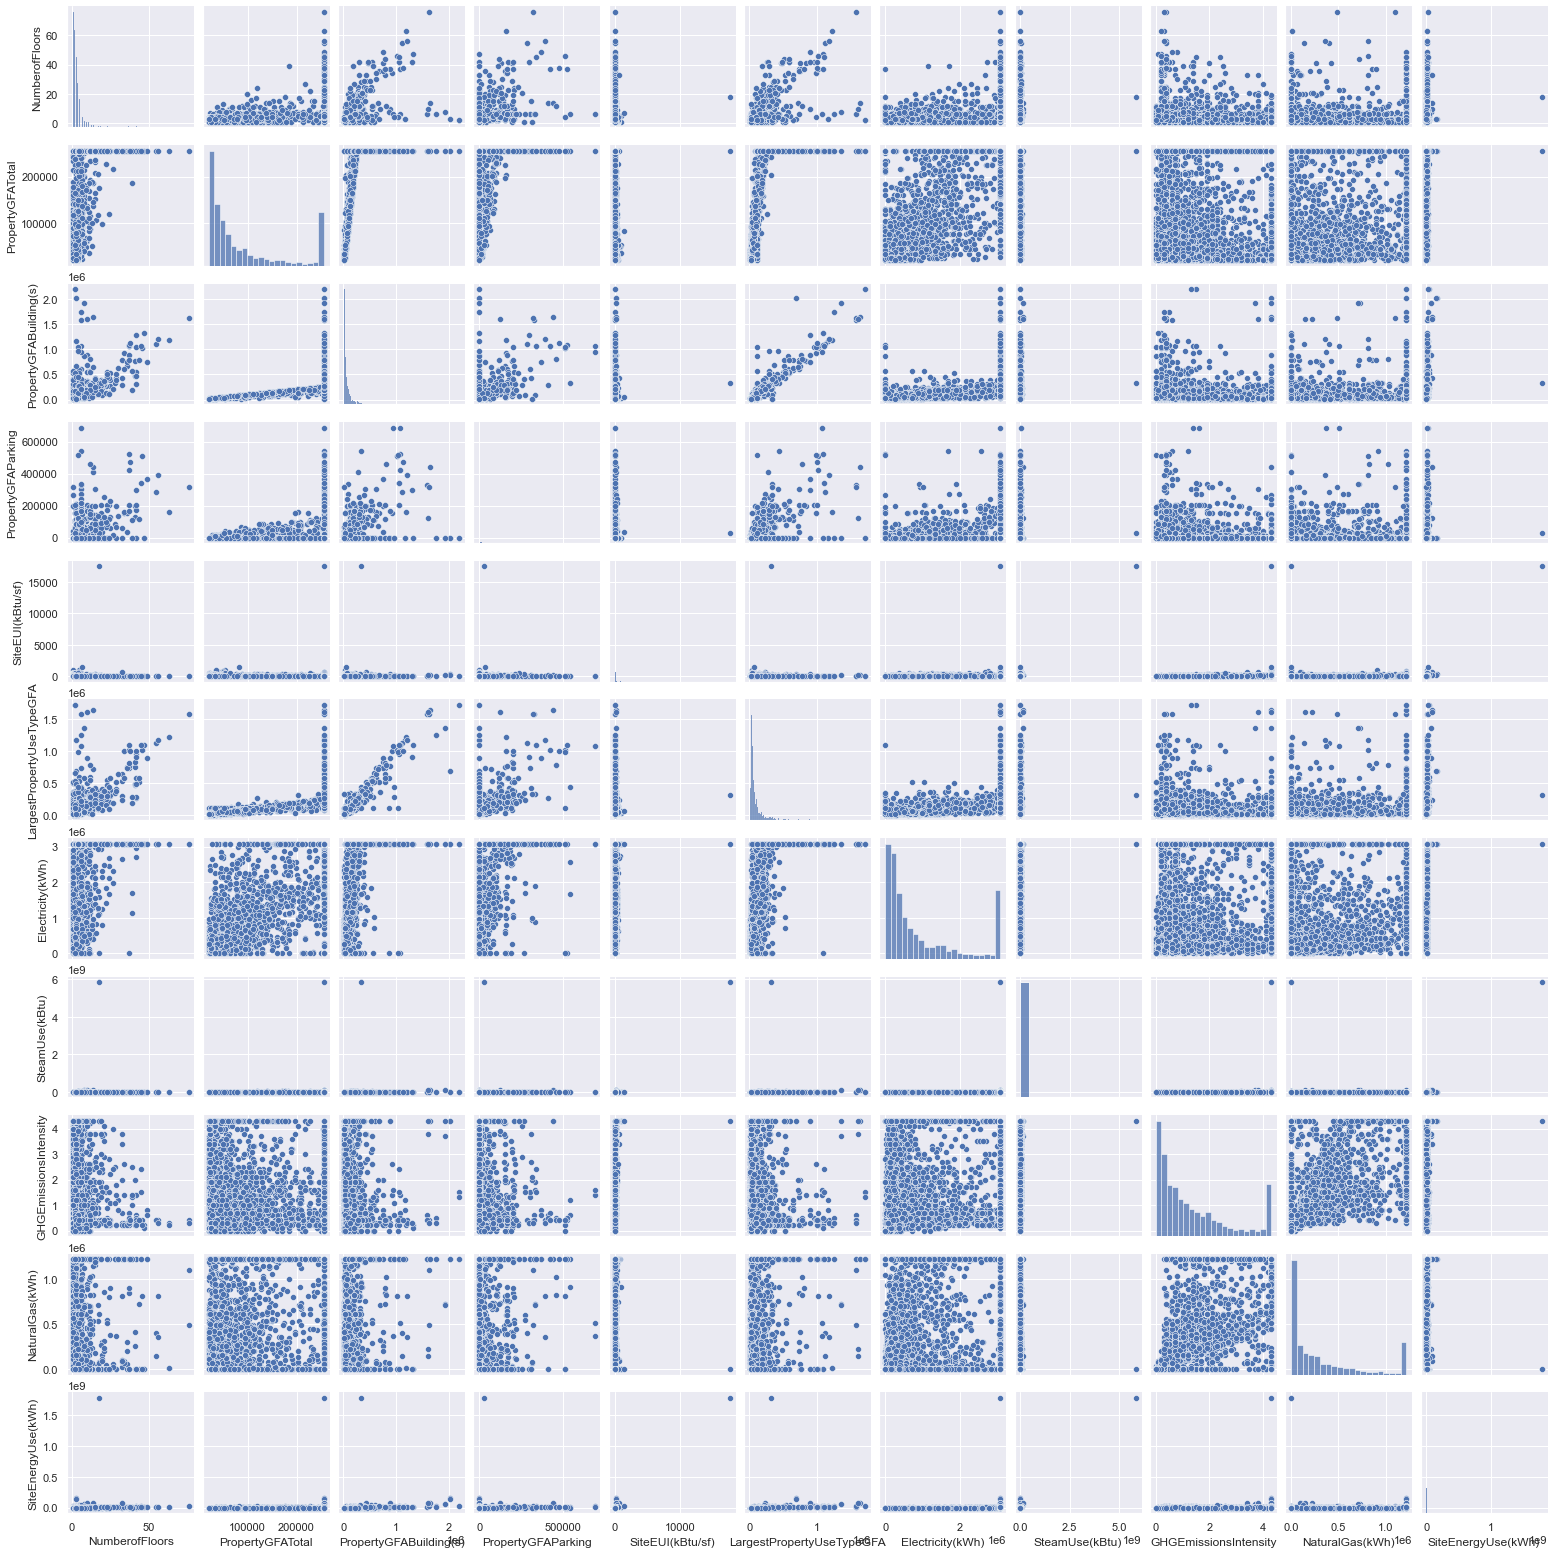

In [221]:
sns.pairplot(clean_data1[corr_columns], height = 2)

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface 
totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, 
SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA :
Vérification de multicolinéarité avec le VIF (Variance Inflation Factor) :  
VIF=1/1-R*R

In [225]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = clean_data1[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

feature        VIF
1           PropertyGFATotal   8.891086
2     PropertyGFABuilding(s)  19.850434
3                  YearBuilt   7.719032
4         SiteEnergyUse(kWh)  70.034855
5           SiteEUI(kBtu/sf)  33.922377
6             SteamUse(kBtu)  62.606244
7           Electricity(kWh)   7.683623
8  LargestPropertyUseTypeGFA  17.330388

### 2.4. Analyse des variables à prédire

Pour rappel, les 2 variables à prédire dans le cadre de notre mission sont :

-GHGEmissionsIntensity
###### -SourceEUI(kWh/sf)
Nous allons donc réaliser quelques analyses exploratoires sur ces features
###### -Test de Kolmogrrow pour la normalité des données

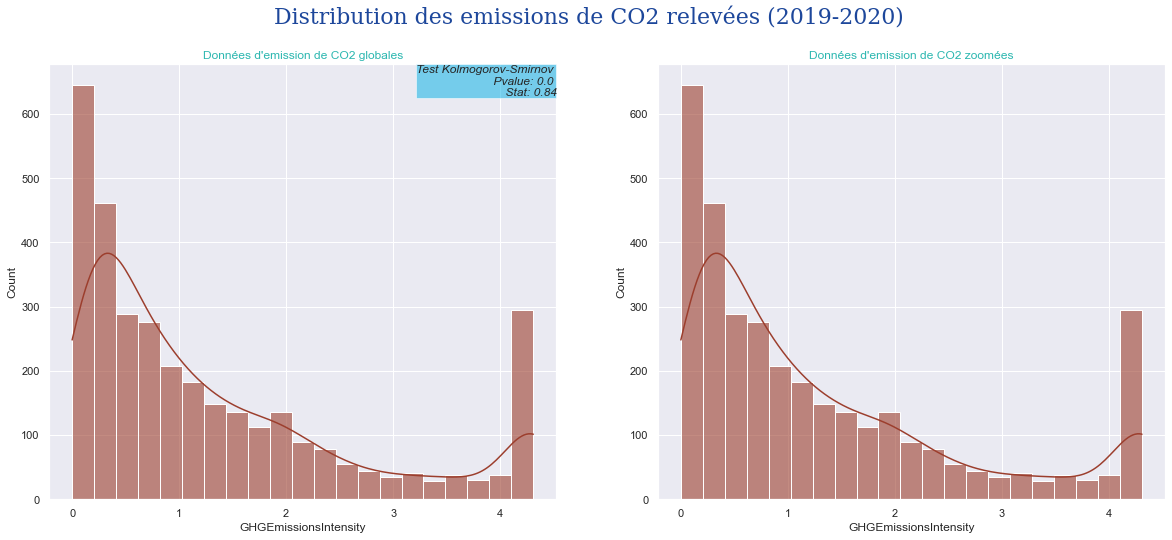

In [256]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=clean_data1, x="GHGEmissionsIntensity", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(clean_data1['GHGEmissionsIntensity'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=clean_data1[(clean_data1['GHGEmissionsIntensity']< 1000)], x="GHGEmissionsIntensity", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='#2cb7b0')

plt.suptitle("Distribution des emissions de CO2 relevées (2019-2020)", 
             fontdict=font_title, fontsize=22)
plt.show()

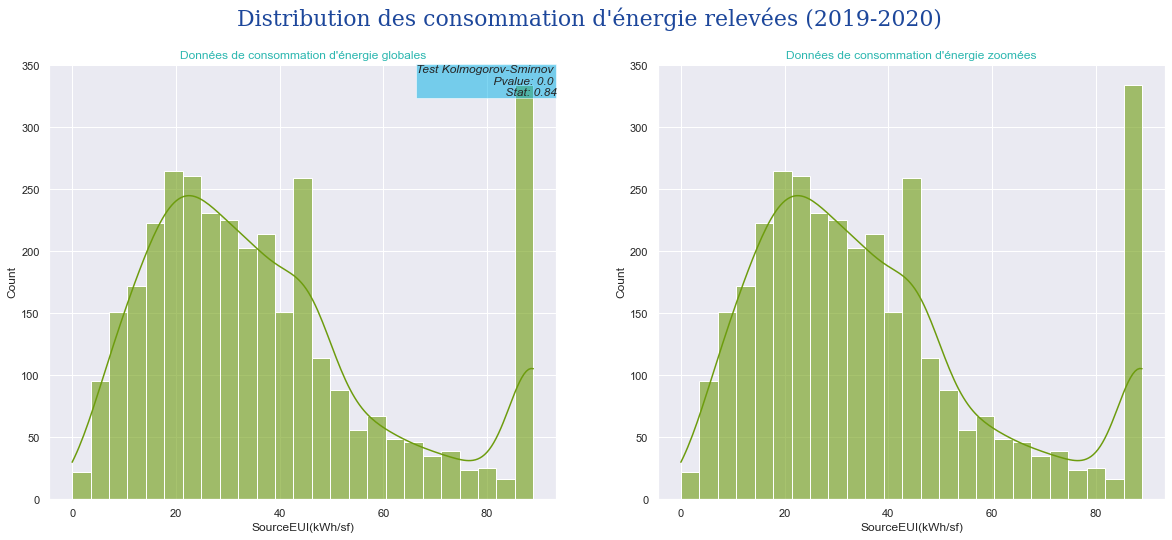

In [257]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=clean_data1, x="SourceEUI(kWh/sf)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(clean_data1['SourceEUI(kWh/sf)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=clean_data1[(clean_data1['SourceEUI(kWh/sf)']< 0.3*10**8)], x="SourceEUI(kWh/sf)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées (2019-2020)", 
             fontdict=font_title, fontsize=22)
plt.show()

### En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables.


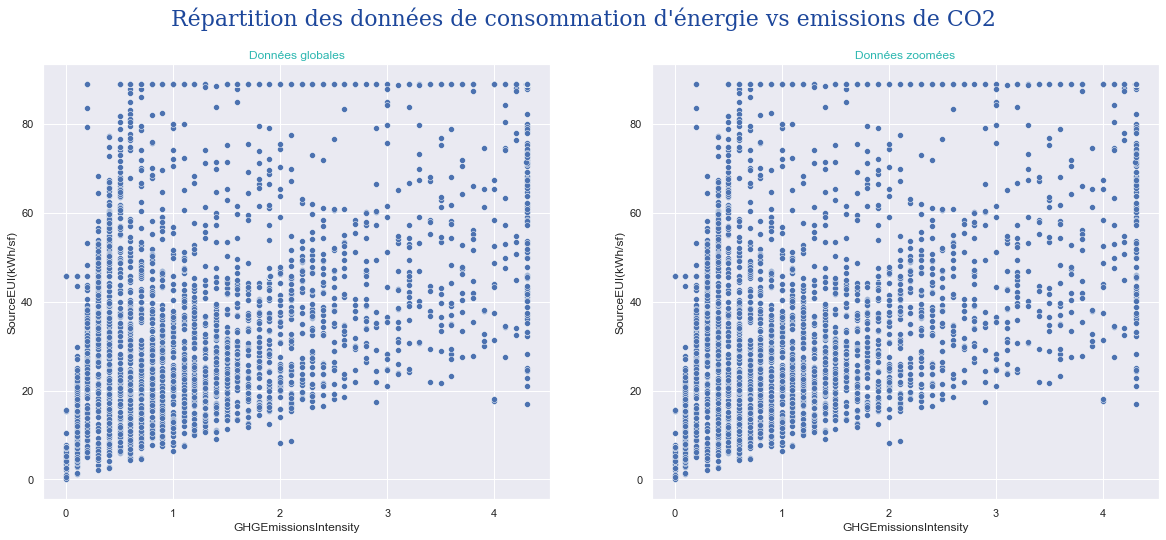

In [229]:
### Projettons à présent les scatterplots des distribition de ces 2 variables entre elles :
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=clean_data1, x="GHGEmissionsIntensity", y="SourceEUI(kWh/sf)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=clean_data1[(clean_data1['GHGEmissionsIntensity'] < 5000)], x="GHGEmissionsIntensity", y="SourceEUI(kWh/sf)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontdict=font_title, fontsize=22)
plt.show()

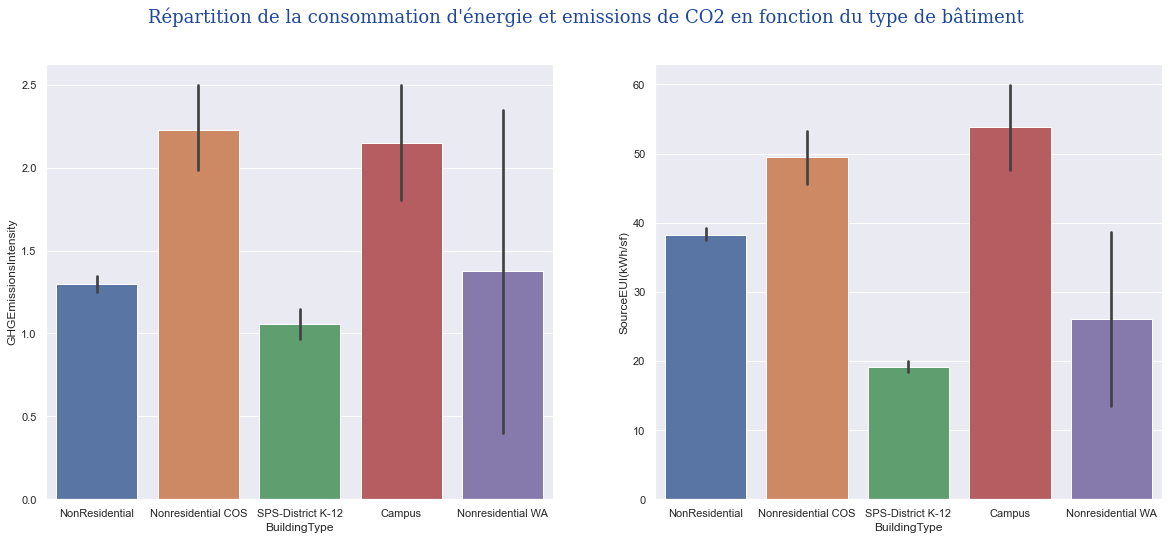

In [258]:
### on remarque ici que la répartion des données d'emission de CO2 en fonction de la consommation d'énergie
#ne suivent pas uniquement 1 seule droite de régression linéaire si l'on zoom sur les données les plus représentées.
### Nous allons à présent regarder la répartition de ces 2 variables en fonction du type de bâtiement.

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='GHGEmissionsIntensity',data=clean_data1, ax=axes[0])
sns.barplot(x='BuildingType',y='SourceEUI(kWh/sf)',data=clean_data1, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

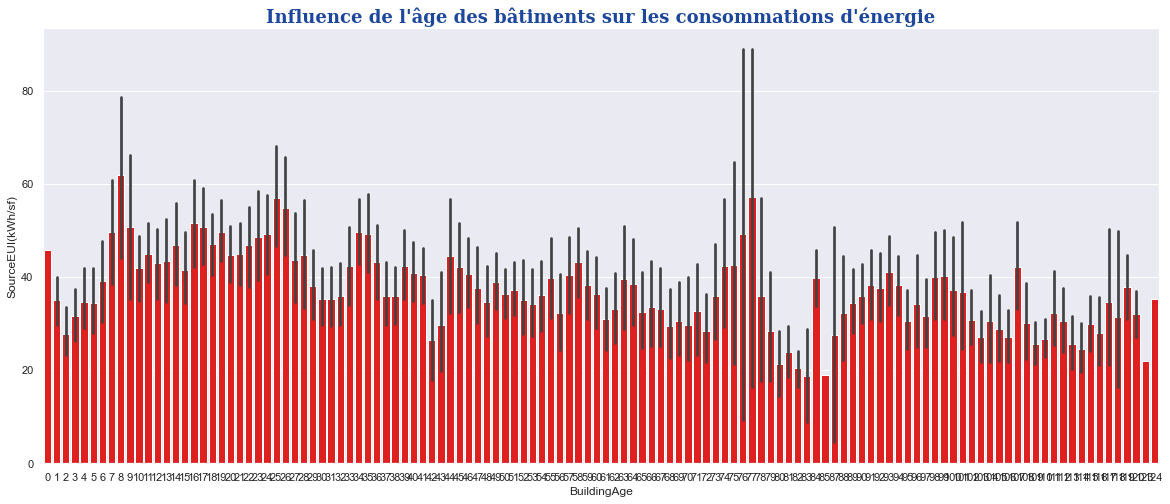

In [232]:
### Sur ces diagrammes en barre, les campus et Non RESIDENTIALCOS se démarquent largement en terme de consommation et de rejets de CO2. 
#Regardons à présent si l'âge des bâtiments a un impact sur les consommations d'energies :

fig, axes = plt.subplots( figsize=(20,8))
sns.barplot(data=clean_data1,x=clean_data1['BuildingAge'], y="SourceEUI(kWh/sf)", color = "red" )
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)

plt.show()

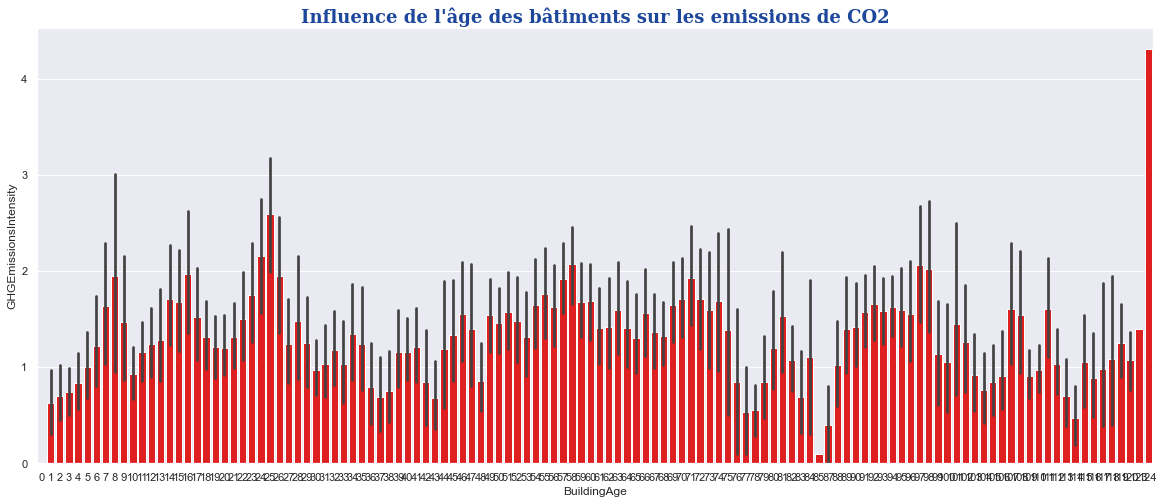

In [233]:
#Regardons à présent si l'âge des bâtiments a un impact sur les émissions de CO2 :

fig, axes = plt.subplots( figsize=(20,8))
sns.barplot(data=clean_data1,x=clean_data1['BuildingAge'], y="GHGEmissionsIntensity", color = "red" )
plt.title("Influence de l'âge des bâtiments sur les emissions de CO2", fontdict=font_title)

plt.show()

In [ ]:
#### lES PLUS JEUNES BATIMENTS SEMBLENT CONSOMMER MOINS D'ENERGIE
#### lES BATIMENTS PLUS ÂGÉS  SEMBLENT EMETTRE PLUS DE CO2
#alors même que la variable BuildingAge n'est pas fortement corrélée à d'autres features 
#(comme la taille des bâtiments par exemple)
### Regardons à présent si les coordonnées géographiques ont un impact sur les rejets et consommations. 
#Pour cela, afin d'éviter les corrélations fortes entre Latitude et Longitude, nous allons calculer la distance 
#Harversine entre chaque point de coordonnées et le centre de Seattle :

In [259]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

#clean_data['Latitude']=clean_data['Latitude'].loc[row_indexer,col_indexer]
#clean_data['Longitude']=clean_data['Longitude'].fillna(0)

In [260]:
#Calcul des distance au centre de Seattle pour chaque point
clean_data1['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(clean_data1.Latitude.astype(float), clean_data1.Longitude.astype(float))]

<ipython-input-260-ebefddd85a2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y)


Text(0.5, 0.98, "Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques")

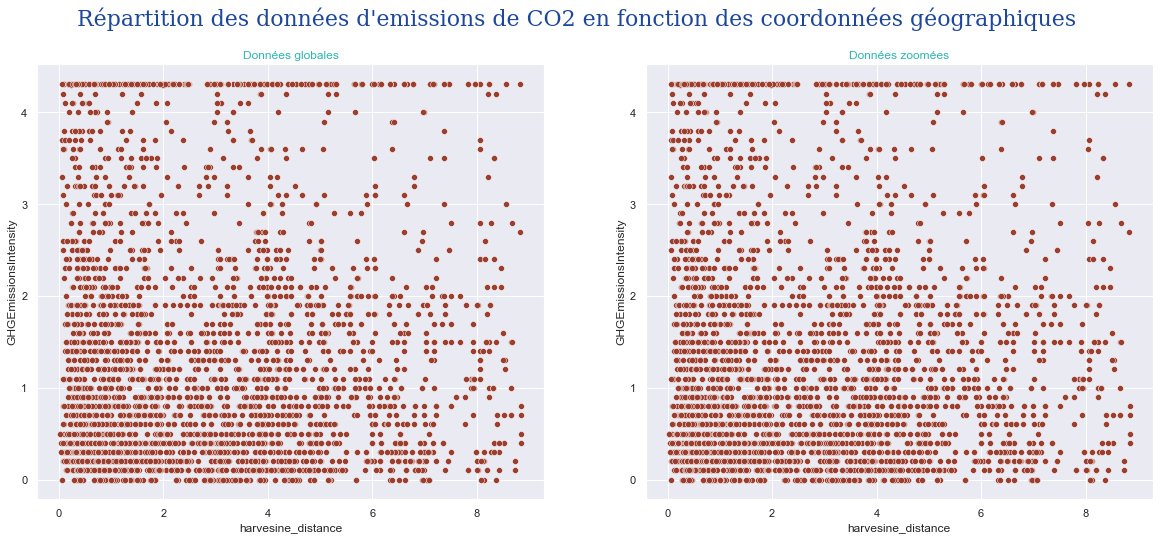

In [261]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=clean_data1, y="GHGEmissionsIntensity", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=clean_data1[(clean_data1['GHGEmissionsIntensity'] < 2500)], y="GHGEmissionsIntensity", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)

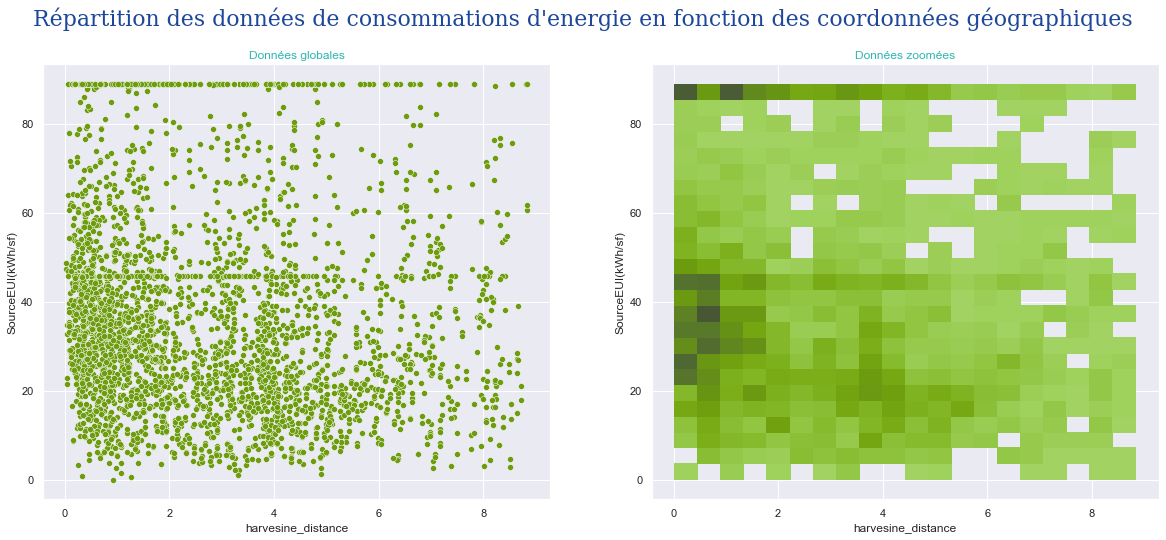

In [262]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=clean_data1, y="SourceEUI(kWh/sf)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=clean_data1[(clean_data1['SourceEUI(kWh/sf)'] < 2*10**8)], y="SourceEUI(kWh/sf)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommations d'energie en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

In [263]:
## If faut droper les batiments sans donneés de location

#clean_data['Latitude'].mean()
#cleaned_data=clean_data[clean_data['Lagitude'].fillna(0)
                        
clean_data1['Latitude']=clean_data1['Latitude'].fillna(1.00000)
clean_data1['Longitude']=clean_data1['Longitude'].fillna(1.00000)


<ipython-input-263-34ae7dfa5496>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['Latitude']=clean_data1['Latitude'].fillna(1.00000)
<ipython-input-263-34ae7dfa5496>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['Longitude']=clean_data1['Longitude'].fillna(1.00000)


In [264]:
### En regardant ces projections, il semble que les coordonnées géographiques (donc les adresses des bâtiments) puissent avoir un impact sur les consommations d'égergie et rejets de CO2.

### D'autre part, la latitude et la longitude étant 2 variables fortement corrélées dans notre jeu de données, 
#nous allons supprimer ces 2 colonnes pour conserver uniquement ce point de coordonnée unique Harvesine .

# 4. Projection des établissements sur la carte de Seattle

import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(clean_data1.Latitude, clean_data1.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

#### On enregistre la base pour les algorithmes

In [265]:
clean_data1.to_csv('Clean_Data.csv', index=False)